### HOMEWORK 3

### WARNINGS :

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### LIBRARIES :

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tpot import TPOTClassifier
from geneticalgorithm import geneticalgorithm as ga
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn_genetic.space import Categorical, Integer, Continuous
from hyperopt import hp
from hyperopt.mongoexp import MongoTrials
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from datetime import timedelta
import time
import pickle
from bayes_opt import BayesianOptimization, UtilityFunction
import os

### READ THE DATASET :

In [ ]:
df = pd.read_csv('Centar_cleaned.csv')
df.head()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.02,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,0.0,...,0,0,0,0,0,0,1,0,1,1
1,30.21,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,0.0,...,0,0,0,0,0,0,1,1,1,1
2,29.40,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,0.0,...,0,0,0,0,0,0,1,2,1,1
3,28.83,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,0.0,...,0,0,0,0,0,0,1,3,1,1
4,27.69,5.62,0.44,2.61,0.6,0.0,0.0,1034.99,14.03,0.0,...,0,0,0,0,0,0,1,4,1,1


In [ ]:
df.tail()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
7347,51.040000,19.62,0.0,10.90,0.56,0.0,0.0,1033.17,24.19,0.0,...,0,1,0,0,0,0,0,19,31,12
7348,59.000000,12.41,0.0,10.41,0.68,0.0,0.0,1033.36,19.20,0.0,...,0,1,0,0,0,0,0,20,31,12
7349,72.295000,13.36,0.0,8.82,0.58,0.0,0.0,1033.55,21.45,0.0,...,0,1,0,0,0,0,0,21,31,12
7350,85.590000,15.63,0.0,10.41,0.79,0.0,0.0,1033.416667,15.63,0.0,...,0,1,0,0,0,0,0,22,31,12
7351,85.571815,13.80,0.0,8.58,0.79,0.0,0.0,1033.283333,13.80,0.0,...,0,1,0,0,0,0,0,23,31,12


### EDA ON DATASET :

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PM10                 7352 non-null   float64
 1   apparentTemperature  7352 non-null   float64
 2   cloudCover           7352 non-null   float64
 3   dewPoint             7352 non-null   float64
 4   humidity             7341 non-null   object 
 5   precipIntensity      7352 non-null   float64
 6   precipProbability    7352 non-null   float64
 7   pressure             7352 non-null   object 
 8   temperature          7352 non-null   float64
 9   uvIndex              7352 non-null   float64
 10  visibility           7352 non-null   float64
 11  windBearing          7352 non-null   float64
 12  windGust             7352 non-null   float64
 13  windSpeed            7319 non-null   float64
 14  no precip            7352 non-null   int64  
 15  rain                 7352 non-null   i

In [ ]:
df.isnull().sum()

PM10                    0
apparentTemperature     0
cloudCover              0
dewPoint                0
humidity               11
precipIntensity         0
precipProbability       0
pressure                0
temperature             0
uvIndex                 0
visibility              0
windBearing             0
windGust                0
windSpeed              33
no precip               0
rain                    0
sleet                   0
snow                    0
Clear                   0
Drizzle                 0
Foggy                   0
Mostly Cloudy           0
Overcast                0
Partly Cloudy           0
hour                    0
day                     0
month                   0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(7352, 27)

In [ ]:
df.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,precipIntensity,precipProbability,temperature,uvIndex,visibility,windBearing,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,72.802447,54.685523,0.419846,42.221562,0.000153,0.004354,55.398536,1.009347,5.702333,157.488002,...,0.000408,0.322905,0.0,0.046382,0.185528,0.168934,0.275027,11.794070,15.931039,6.318689
std,82.213323,19.914153,0.387737,12.873506,0.001423,0.031988,19.102358,1.798912,1.364594,39.917837,...,0.020198,0.467619,0.0,0.210325,0.388752,0.374719,0.446558,6.754697,8.791142,3.528810
min,0.270000,0.430000,0.000000,-2.210000,0.000000,0.000000,4.830000,0.000000,0.031000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,27.627500,38.522500,0.000000,32.620000,0.000000,0.000000,39.400000,0.000000,6.216000,150.882759,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,3.000000
50%,42.680000,53.390000,0.390000,42.800000,0.000000,0.000000,53.390000,0.000000,6.216000,157.488002,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,16.000000,6.000000
75%,77.680000,69.650000,0.750000,53.590000,0.000000,0.000000,69.610000,1.009347,6.216000,166.114391,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,18.000000,23.000000,9.000000
max,815.170000,104.870000,1.000000,69.810000,0.033200,0.240000,103.810000,9.000000,6.216000,359.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000


In [ ]:
df.columns

Index(['PM10', 'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'uvIndex', 'visibility', 'windBearing', 'windGust', 'windSpeed',
       'no precip', 'rain', 'sleet', 'snow', 'Clear', 'Drizzle', 'Foggy',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'hour', 'day', 'month'],
      dtype='object')

In [ ]:
df.nunique()

PM10                   5492
apparentTemperature    2080
cloudCover               90
dewPoint               2428
humidity                 89
precipIntensity          17
precipProbability         3
pressure               4180
temperature            1523
uvIndex                  11
visibility               62
windBearing             374
windGust                342
windSpeed               493
no precip                 2
rain                      2
sleet                     1
snow                      2
Clear                     2
Drizzle                   1
Foggy                     2
Mostly Cloudy             2
Overcast                  2
Partly Cloudy             2
hour                     24
day                      31
month                    12
dtype: int64

In [ ]:
df.dtypes

PM10                   float64
apparentTemperature    float64
cloudCover             float64
dewPoint               float64
humidity                object
precipIntensity        float64
precipProbability      float64
pressure                object
temperature            float64
uvIndex                float64
visibility             float64
windBearing            float64
windGust               float64
windSpeed              float64
no precip                int64
rain                     int64
sleet                    int64
snow                     int64
Clear                    int64
Drizzle                  int64
Foggy                    int64
Mostly Cloudy            int64
Overcast                 int64
Partly Cloudy            int64
hour                     int64
day                      int64
month                    int64
dtype: object

In [ ]:
# Gi delam kolonite na Categorical i Numerical da vidam kako mi e raspredelen data-setot

cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("----------------------------------")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['humidity', 'pressure'], dtype='object')
----------------------------------
Numerical Variables:
['PM10', 'apparentTemperature', 'cloudCover', 'dewPoint', 'precipIntensity', 'precipProbability', 'temperature', 'uvIndex', 'visibility', 'windBearing', 'windGust', 'windSpeed', 'no precip', 'rain', 'sleet', 'snow', 'Clear', 'Drizzle', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'hour', 'day', 'month']


In [ ]:
# Sakam da vidam koi koloni mi nemaat standardna devijacija, tie sto nemaat sakam da gi izbrisam
# bidejki ne ni davaat nikakov parametar za analiziranje

df.std()

PM10                   82.213323
apparentTemperature    19.914153
cloudCover              0.387737
dewPoint               12.873506
precipIntensity         0.001423
precipProbability       0.031988
temperature            19.102358
uvIndex                 1.798912
visibility              1.364594
windBearing            39.917837
windGust                6.688367
windSpeed               3.830459
no precip               0.142302
rain                    0.140920
sleet                   0.000000
snow                    0.020198
Clear                   0.467619
Drizzle                 0.000000
Foggy                   0.210325
Mostly Cloudy           0.388752
Overcast                0.374719
Partly Cloudy           0.446558
hour                    6.754697
day                     8.791142
month                   3.528810
dtype: float64

In [ ]:
# Gledam koi koloni imaat pomalku od 0.03 std, so cel da gi izbrisam

df.std() > 0.03

PM10                    True
apparentTemperature     True
cloudCover              True
dewPoint                True
precipIntensity        False
precipProbability       True
temperature             True
uvIndex                 True
visibility              True
windBearing             True
windGust                True
windSpeed               True
no precip               True
rain                    True
sleet                  False
snow                   False
Clear                   True
Drizzle                False
Foggy                   True
Mostly Cloudy           True
Overcast                True
Partly Cloudy           True
hour                    True
day                     True
month                   True
dtype: bool

In [ ]:
col_with_no_std = ['precipIntensity','sleet','snow','Drizzle']
df.drop(columns = col_with_no_std, inplace=True)

In [ ]:
# proverka

df.std() > 0.03

PM10                   True
apparentTemperature    True
cloudCover             True
dewPoint               True
precipProbability      True
temperature            True
uvIndex                True
visibility             True
windBearing            True
windGust               True
windSpeed              True
no precip              True
rain                   True
Clear                  True
Foggy                  True
Mostly Cloudy          True
Overcast               True
Partly Cloudy          True
hour                   True
day                    True
month                  True
dtype: bool

,PM10,apparentTemperature,cloudCover,dewPoint,precipProbability,temperature,uvIndex,visibility,windBearing,windGust,...,no precip,rain,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
PM10,1.00,-0.44,-0.04,-0.40,-0.04,-0.46,-0.20,-0.68,0.09,-0.24,...,0.04,-0.04,0.05,0.49,-0.05,-0.14,-0.13,-0.02,-0.04,0.13
apparentTemperature,-0.44,1.00,-0.25,0.84,-0.05,1.00,0.42,0.37,-0.01,0.10,...,0.06,-0.05,0.04,-0.23,-0.03,-0.22,0.28,0.17,0.01,0.21
cloudCover,-0.04,-0.25,1.00,-0.07,0.18,-0.24,0.00,-0.18,-0.06,0.18,...,-0.17,0.17,-0.75,0.16,0.39,0.67,-0.20,-0.02,0.10,-0.16
dewPoint,-0.40,0.84,-0.07,1.00,0.01,0.84,0.26,0.30,0.02,0.05,...,-0.00,0.01,-0.04,-0.18,0.02,-0.07,0.17,0.05,0.05,0.26
precipProbability,-0.04,-0.05,0.18,0.01,1.00,-0.05,-0.02,-0.00,-0.02,-0.02,...,-0.94,0.95,-0.09,-0.01,0.00,0.21,-0.07,0.08,0.00,-0.09
temperature,-0.46,1.00,-0.24,0.84,-0.05,1.00,0.42,0.39,-0.03,0.14,...,0.05,-0.05,0.03,-0.24,-0.02,-0.21,0.28,0.18,0.01,0.20
uvIndex,-0.20,0.42,0.00,0.26,-0.02,0.42,1.00,0.14,-0.06,0.15,...,0.02,-0.02,-0.20,-0.09,0.04,-0.08,0.29,-0.08,0.00,-0.03
visibility,-0.68,0.37,-0.18,0.30,-0.00,0.39,0.14,1.00,-0.08,0.21,...,0.01,-0.00,0.12,-0.78,0.08,0.02,0.15,0.10,-0.02,-0.11
windBearing,0.09,-0.01,-0.06,0.02,-0.02,-0.03,-0.06,-0.08,1.00,-0.26,...,0.02,-0.02,0.05,0.05,-0.06,-0.01,-0.01,-0.07,-0.02,0.18
windGust,-0.24,0.10,0.18,0.05,-0.02,0.14,0.15,0.21,-0.26,1.00,...,0.02,-0.03,-0.20,-0.13,0.11,0.11,0.08,0.03,0.06,-0.05


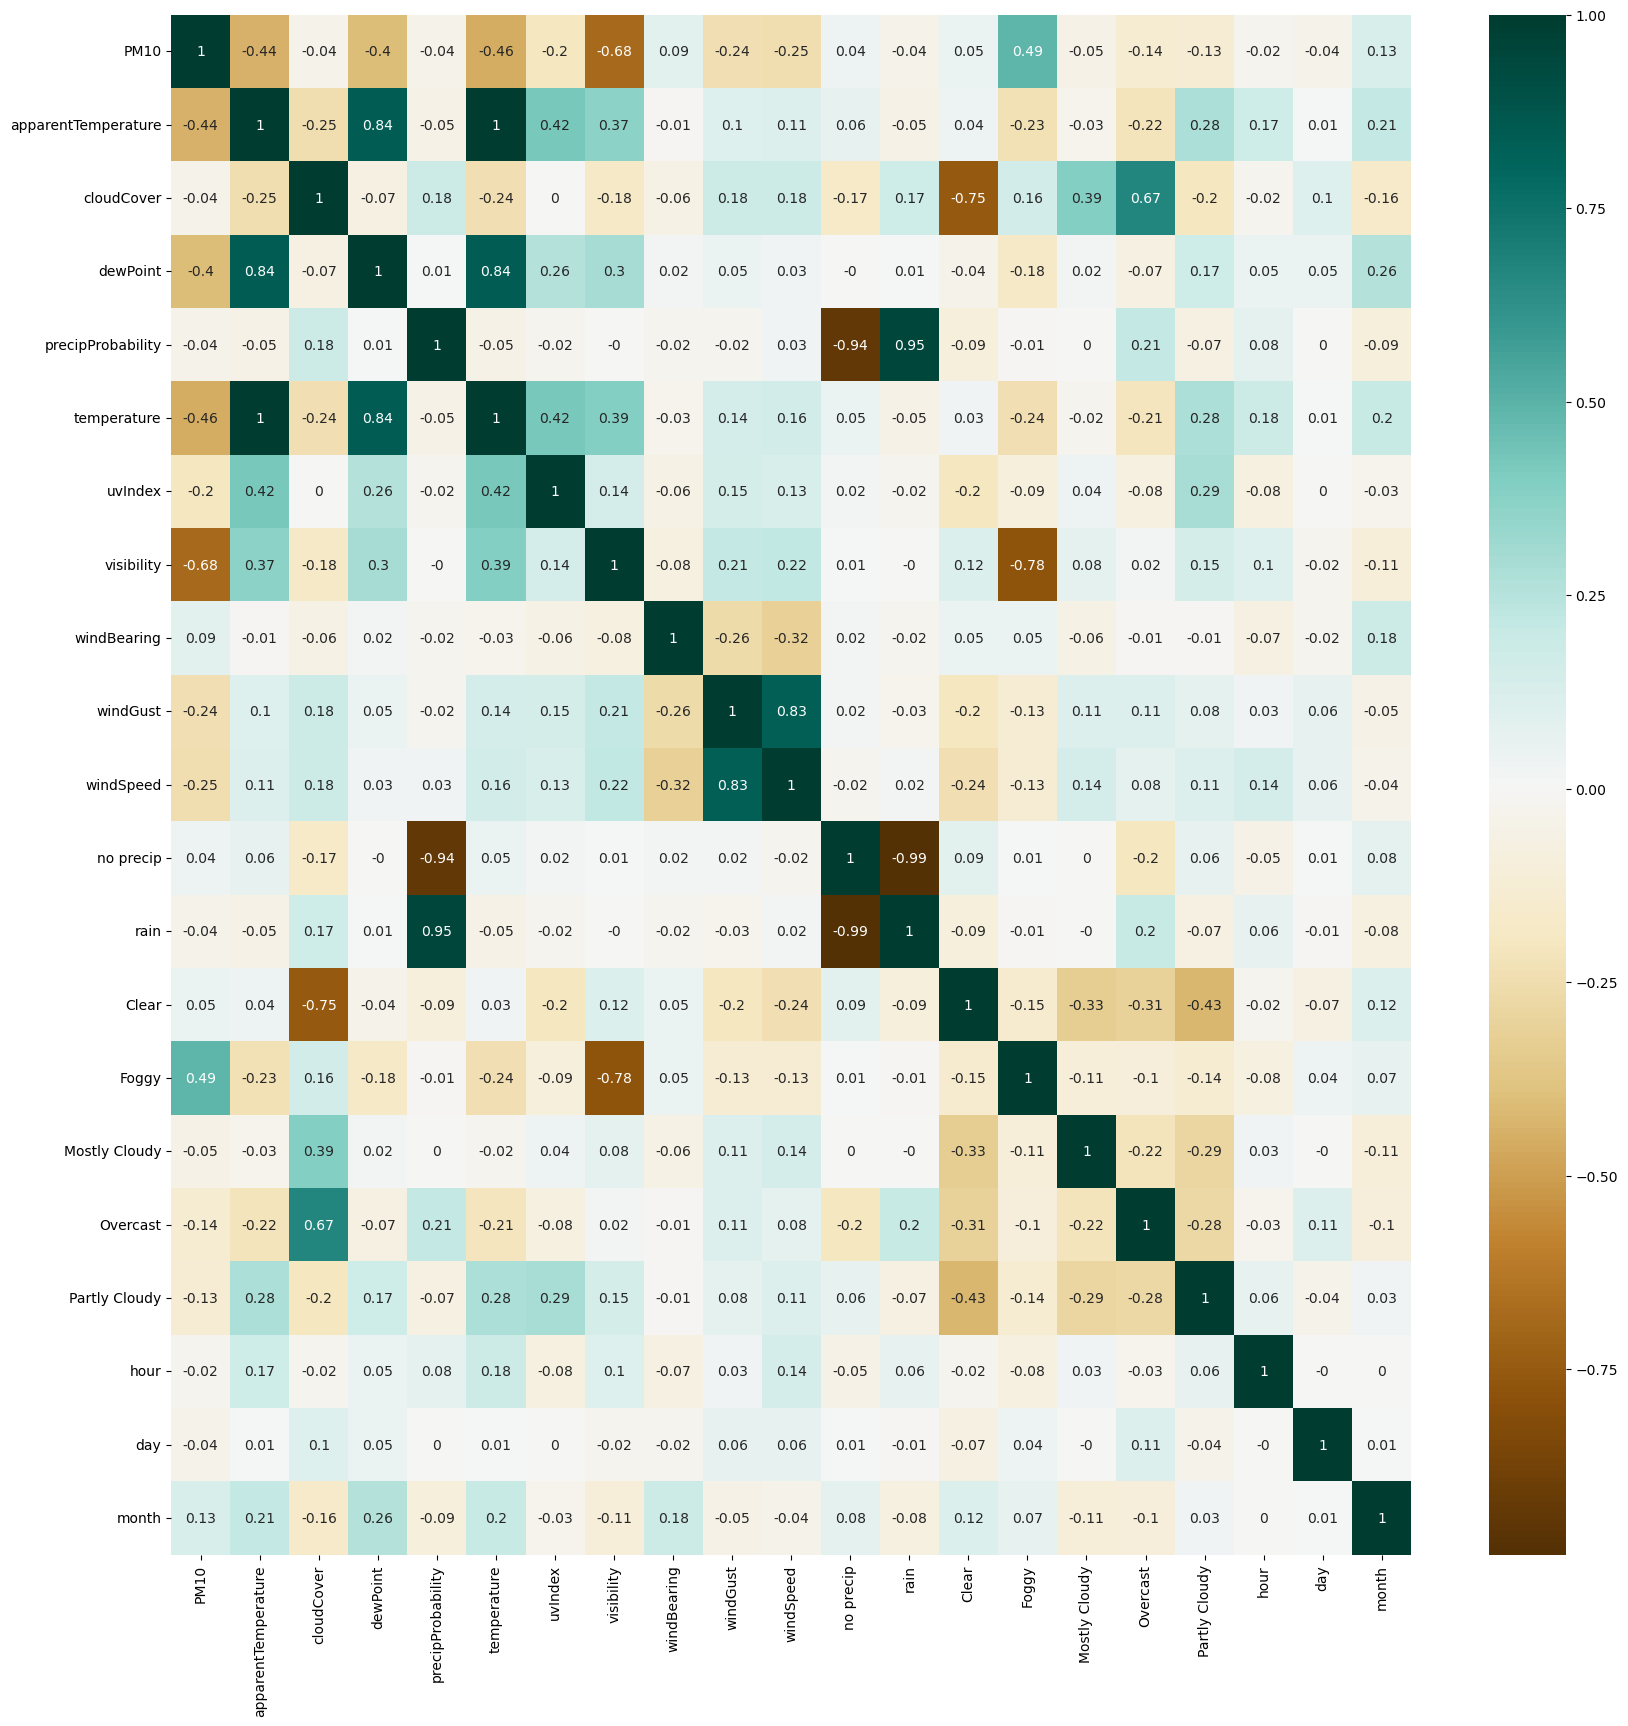

In [ ]:
# plot za korelacija, sakam da vidam kakva povrzanost imam megu kolonite

plt.figure(figsize=(20,20))
c= df.corr().round(2)
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# Gledam od plotot deka korelacijata pomegu kolonata apparentTemperature i temperature mi e 1, pa ja birsam taa kolona

col_with_1_corr = ['apparentTemperature']
df.drop(columns = col_with_1_corr, inplace=True)

,PM10,cloudCover,dewPoint,precipProbability,temperature,uvIndex,visibility,windBearing,windGust,windSpeed,no precip,rain,Clear,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
PM10,1.00,-0.04,-0.40,-0.04,-0.46,-0.20,-0.68,0.09,-0.24,-0.25,0.04,-0.04,0.05,0.49,-0.05,-0.14,-0.13,-0.02,-0.04,0.13
cloudCover,-0.04,1.00,-0.07,0.18,-0.24,0.00,-0.18,-0.06,0.18,0.18,-0.17,0.17,-0.75,0.16,0.39,0.67,-0.20,-0.02,0.10,-0.16
dewPoint,-0.40,-0.07,1.00,0.01,0.84,0.26,0.30,0.02,0.05,0.03,-0.00,0.01,-0.04,-0.18,0.02,-0.07,0.17,0.05,0.05,0.26
precipProbability,-0.04,0.18,0.01,1.00,-0.05,-0.02,-0.00,-0.02,-0.02,0.03,-0.94,0.95,-0.09,-0.01,0.00,0.21,-0.07,0.08,0.00,-0.09
temperature,-0.46,-0.24,0.84,-0.05,1.00,0.42,0.39,-0.03,0.14,0.16,0.05,-0.05,0.03,-0.24,-0.02,-0.21,0.28,0.18,0.01,0.20
uvIndex,-0.20,0.00,0.26,-0.02,0.42,1.00,0.14,-0.06,0.15,0.13,0.02,-0.02,-0.20,-0.09,0.04,-0.08,0.29,-0.08,0.00,-0.03
visibility,-0.68,-0.18,0.30,-0.00,0.39,0.14,1.00,-0.08,0.21,0.22,0.01,-0.00,0.12,-0.78,0.08,0.02,0.15,0.10,-0.02,-0.11
windBearing,0.09,-0.06,0.02,-0.02,-0.03,-0.06,-0.08,1.00,-0.26,-0.32,0.02,-0.02,0.05,0.05,-0.06,-0.01,-0.01,-0.07,-0.02,0.18
windGust,-0.24,0.18,0.05,-0.02,0.14,0.15,0.21,-0.26,1.00,0.83,0.02,-0.03,-0.20,-0.13,0.11,0.11,0.08,0.03,0.06,-0.05
windSpeed,-0.25,0.18,0.03,0.03,0.16,0.13,0.22,-0.32,0.83,1.00,-0.02,0.02,-0.24,-0.13,0.14,0.08,0.11,0.14,0.06,-0.04


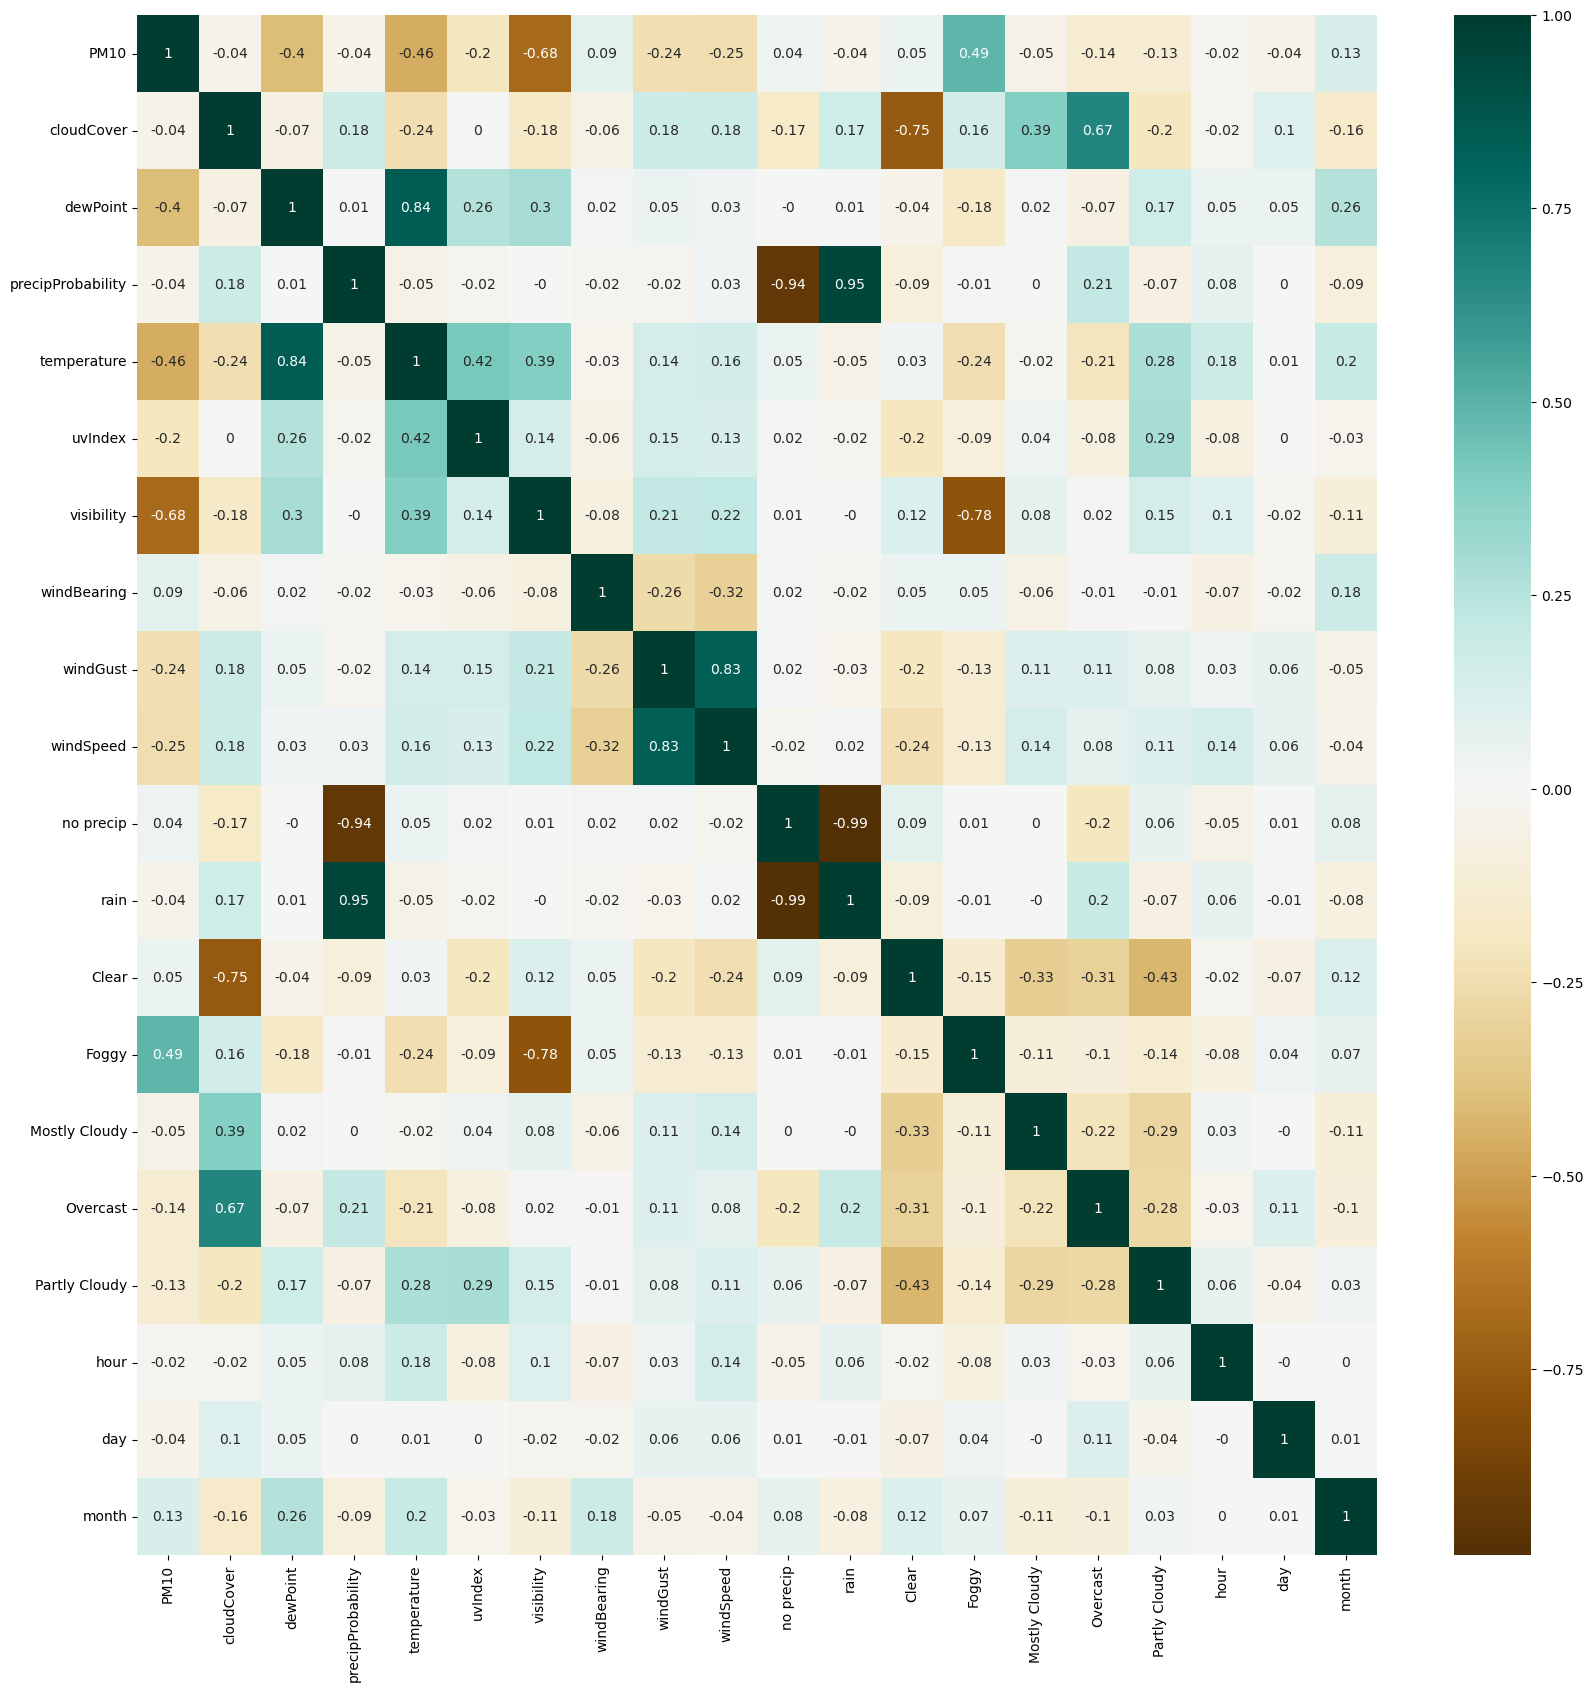

In [ ]:
# proverka

plt.figure(figsize=(20,20))
c= df.corr().round(2)
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# Go menuvam type-ot od object vo float

df["humidity"] = pd.to_numeric(df['humidity'],errors='coerce').astype(float)
df["pressure"] = pd.to_numeric(df['pressure'],errors='coerce').astype(float)

In [1]:
import numpy as np
np.nan

nan

In [ ]:
# proverka

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PM10               7352 non-null   float64
 1   cloudCover         7352 non-null   float64
 2   dewPoint           7352 non-null   float64
 3   humidity           7338 non-null   float64
 4   precipProbability  7352 non-null   float64
 5   pressure           7349 non-null   float64
 6   temperature        7352 non-null   float64
 7   uvIndex            7352 non-null   float64
 8   visibility         7352 non-null   float64
 9   windBearing        7352 non-null   float64
 10  windGust           7352 non-null   float64
 11  windSpeed          7319 non-null   float64
 12  no precip          7352 non-null   int64  
 13  rain               7352 non-null   int64  
 14  Clear              7352 non-null   int64  
 15  Foggy              7352 non-null   int64  
 16  Mostly Cloudy      7352 

In [ ]:
# Kolonite sto mi imaat null-ovi gi sreduvam so mediana

df['windSpeed'].fillna(df['windSpeed'].median(),inplace=True)
df['humidity'].fillna(df['humidity'].median(),inplace=True)
df['pressure'].fillna(df['pressure'].median(),inplace=True)

In [ ]:
# proverka

df.isnull().sum()

PM10                 0
cloudCover           0
dewPoint             0
humidity             0
precipProbability    0
pressure             0
temperature          0
uvIndex              0
visibility           0
windBearing          0
windGust             0
windSpeed            0
no precip            0
rain                 0
Clear                0
Foggy                0
Mostly Cloudy        0
Overcast             0
Partly Cloudy        0
hour                 0
day                  0
month                0
dtype: int64

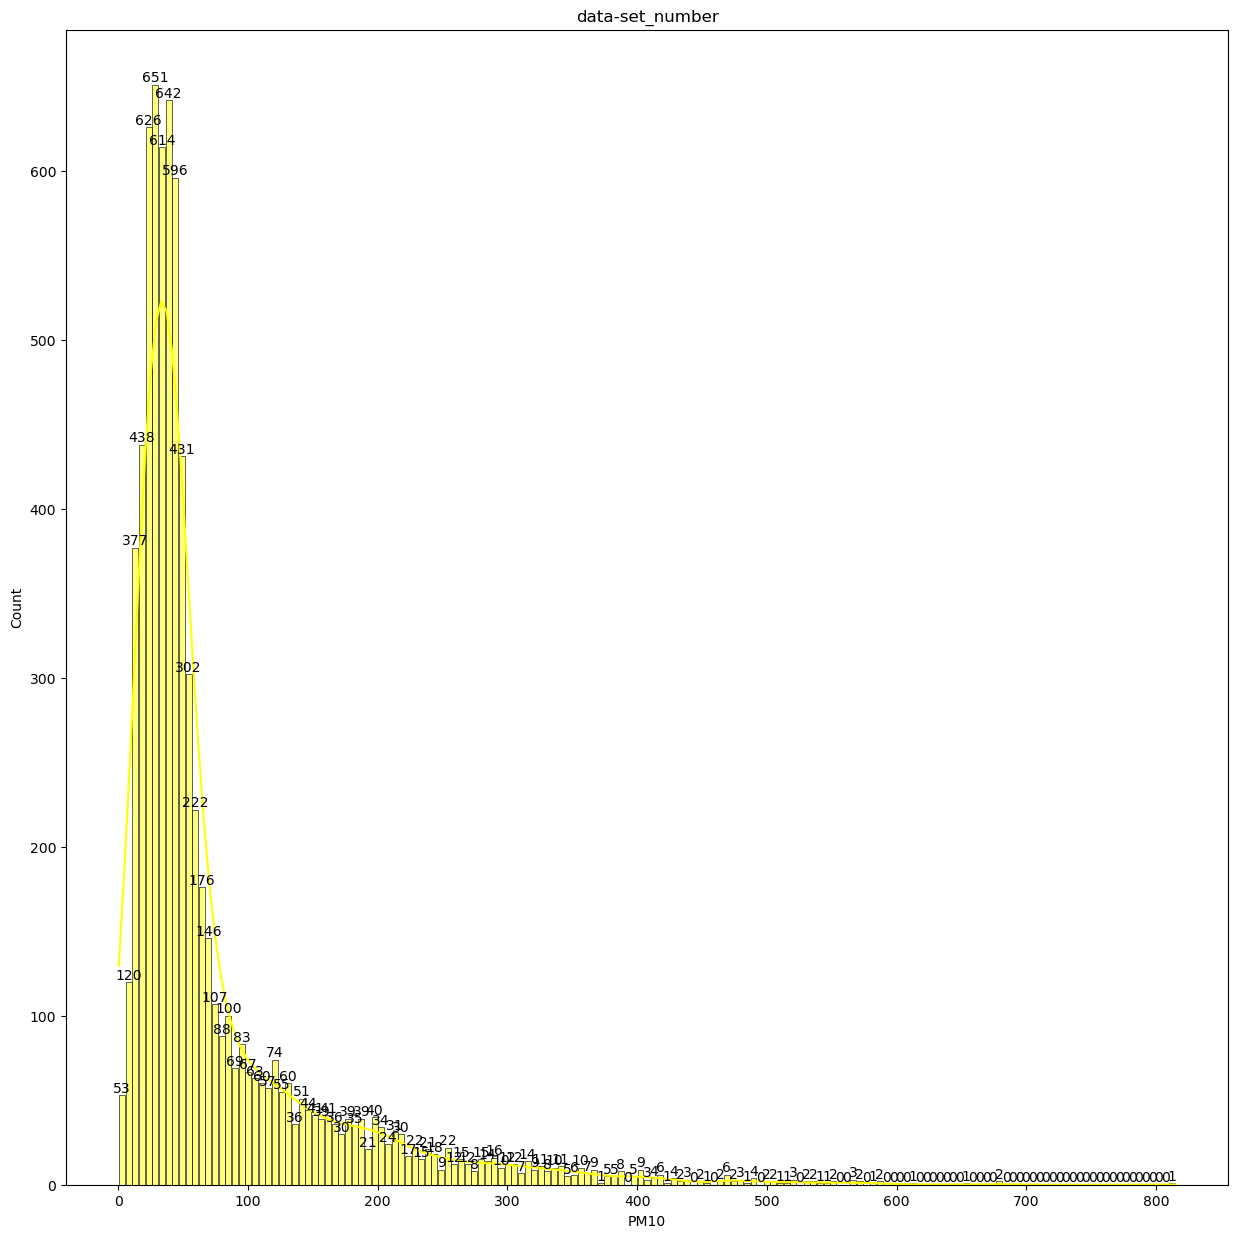

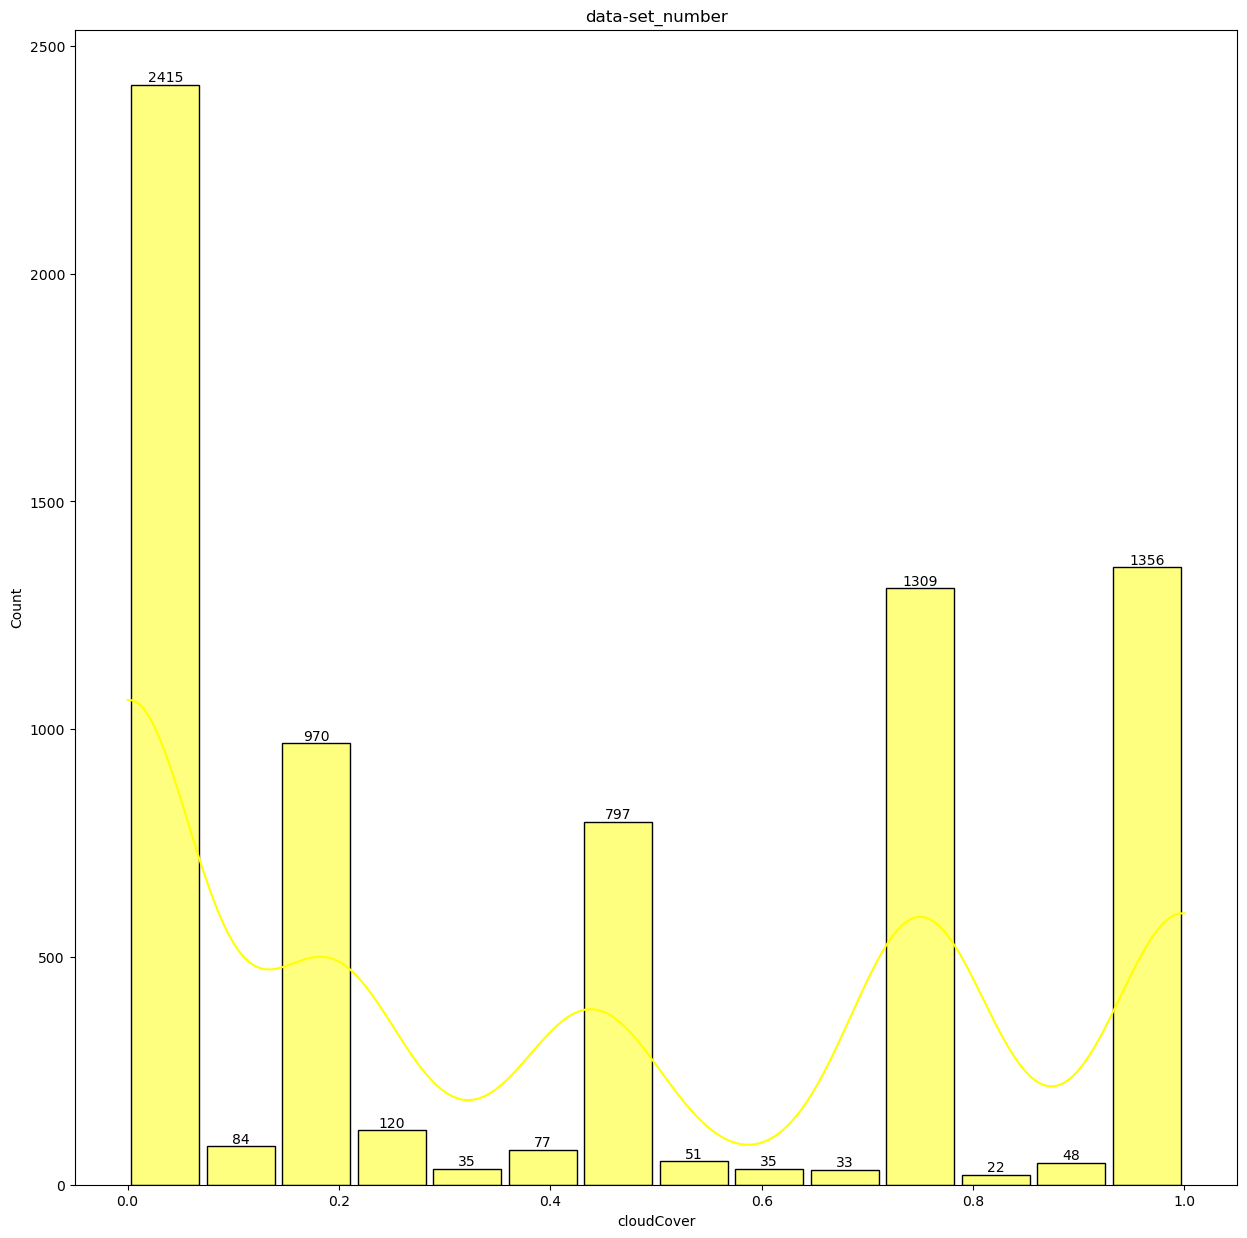

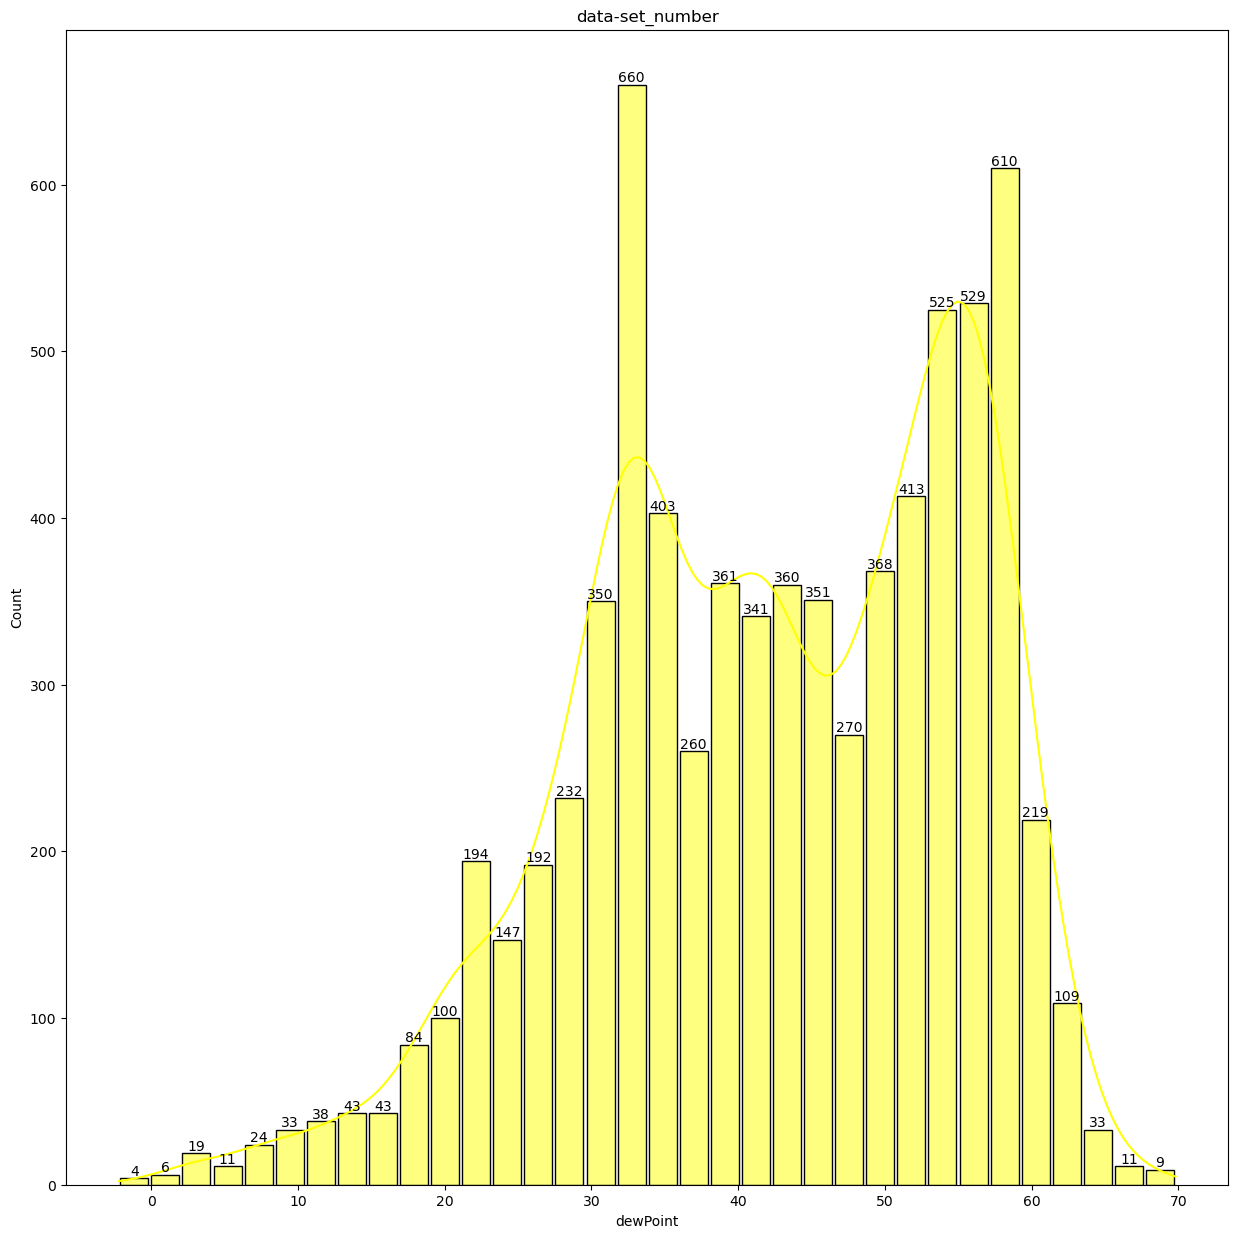

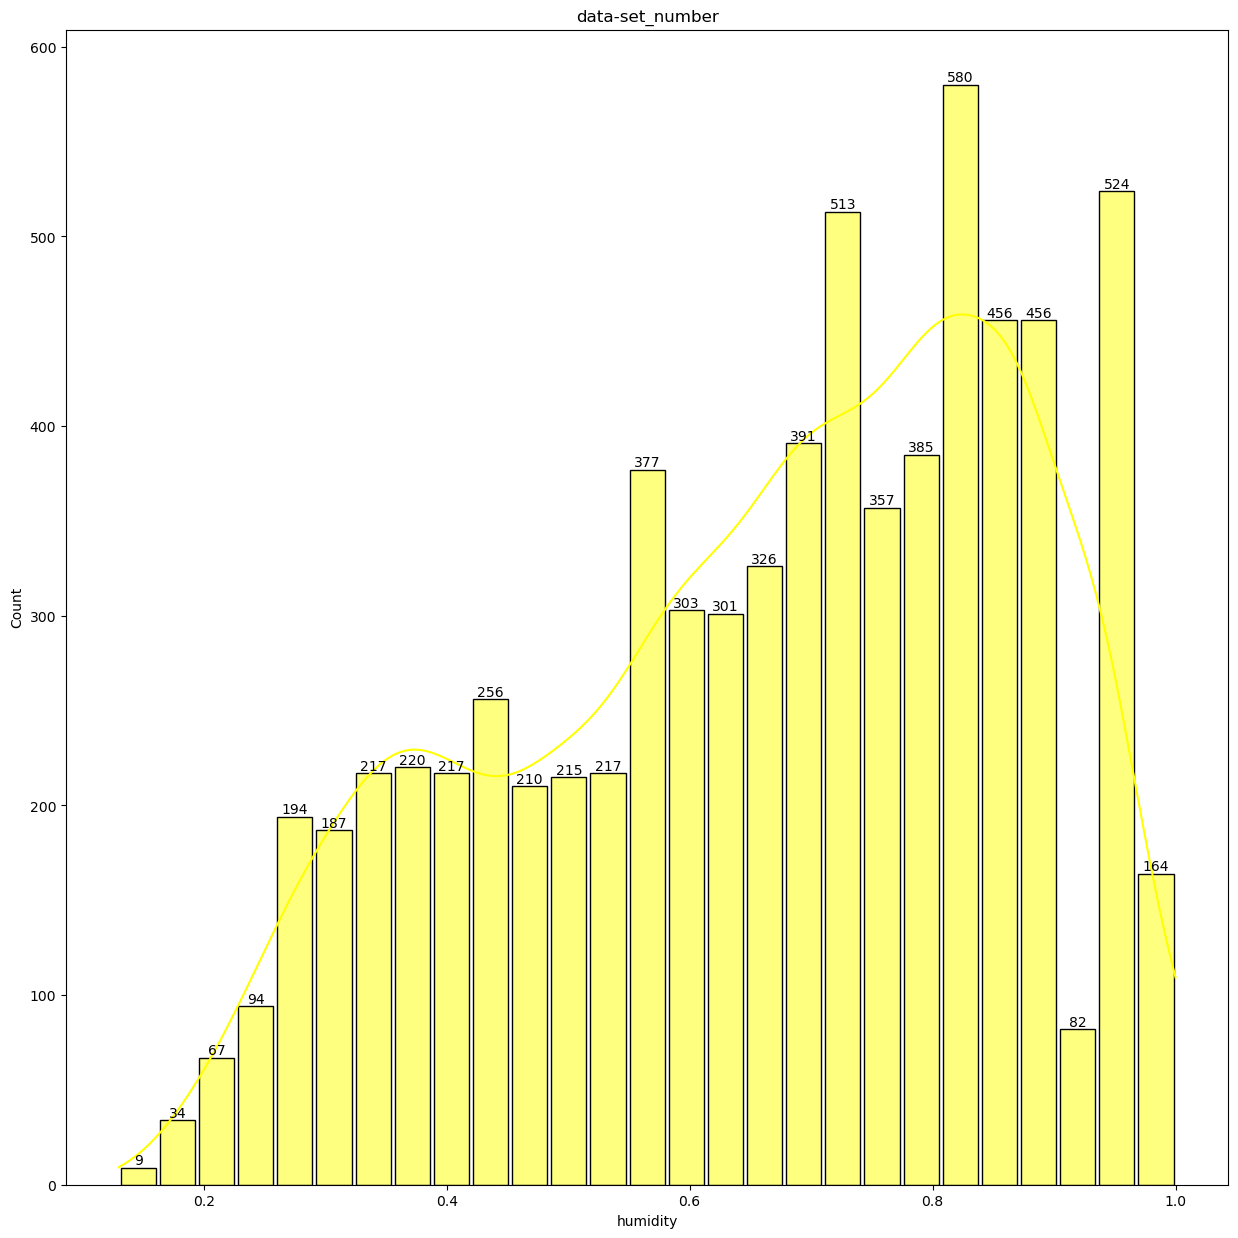

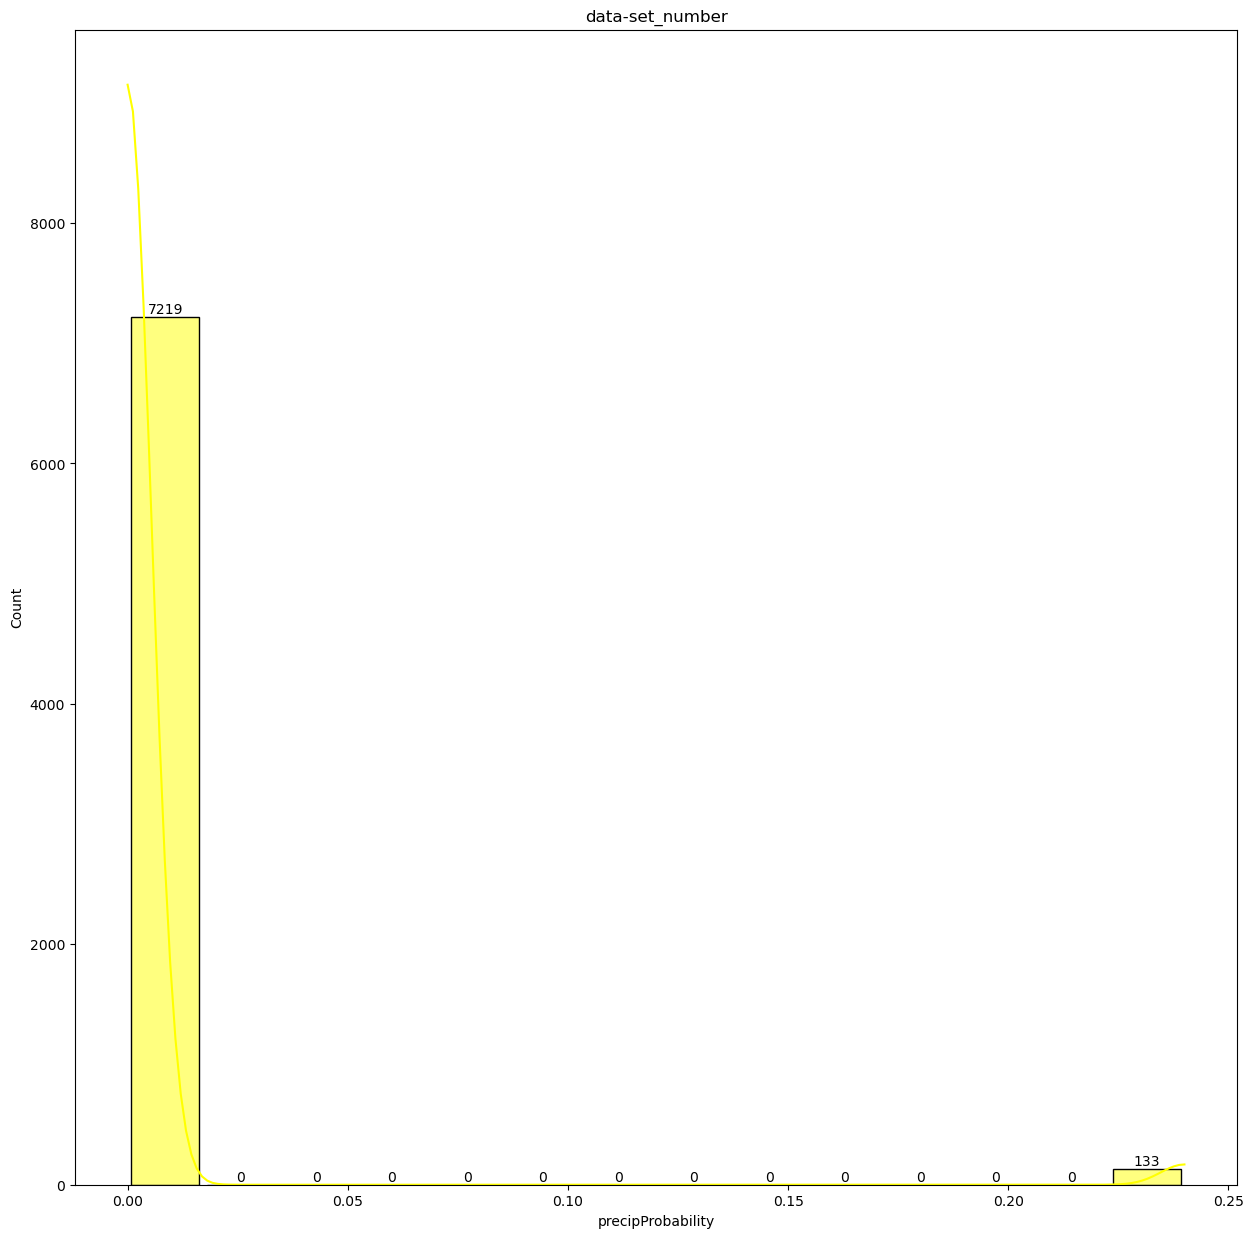

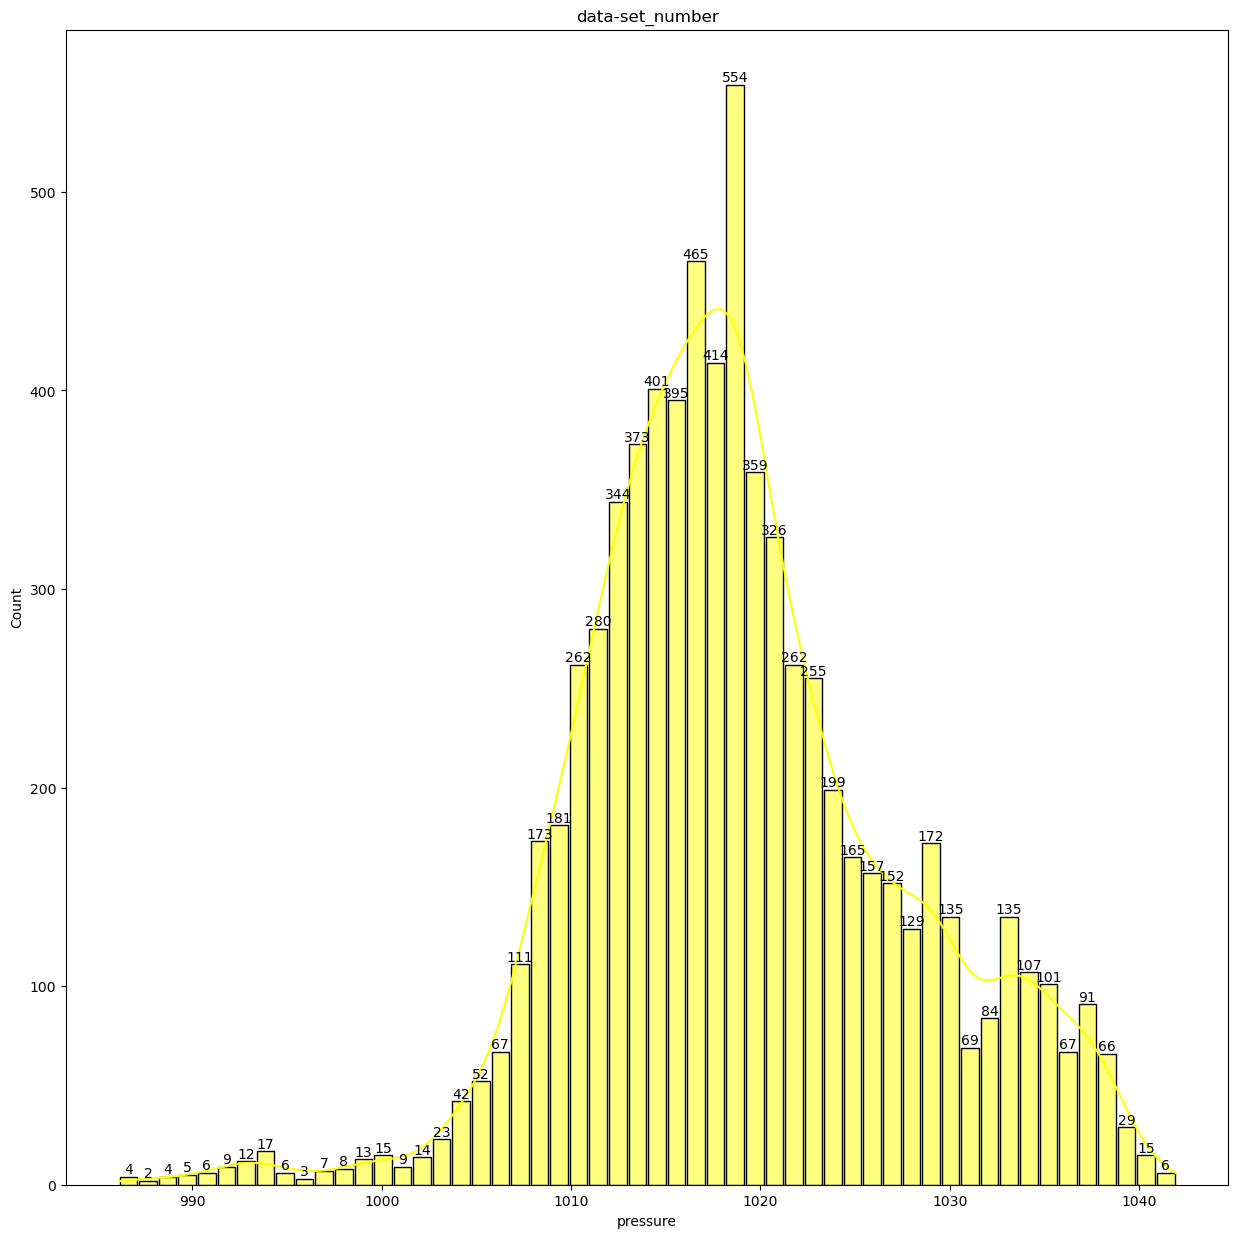

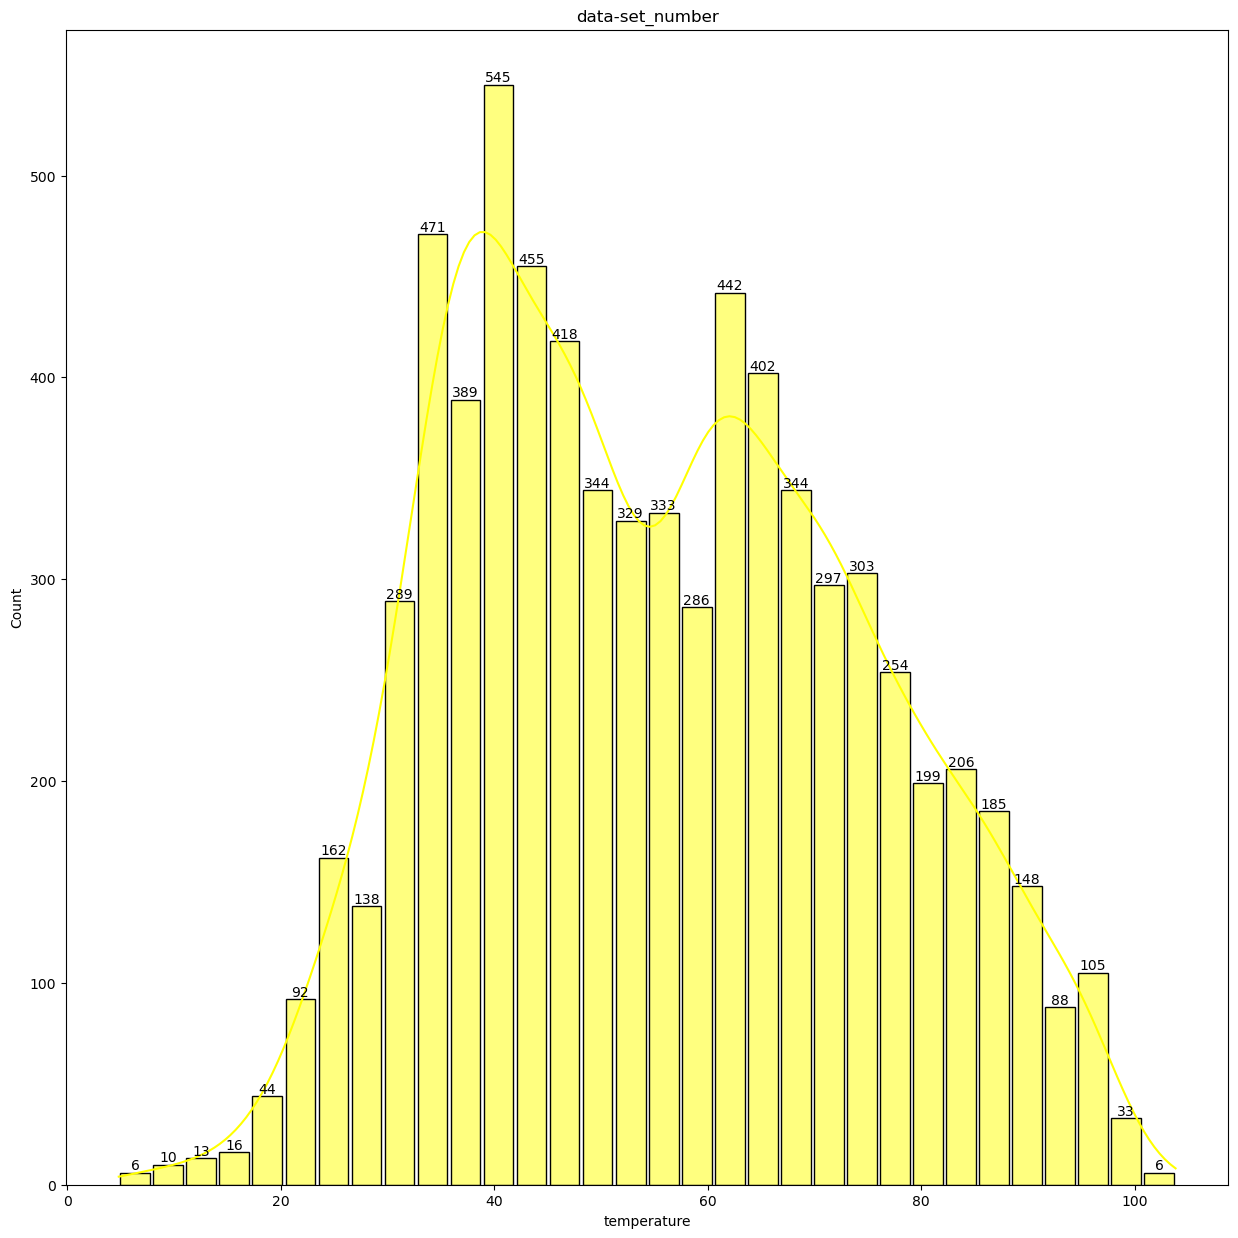

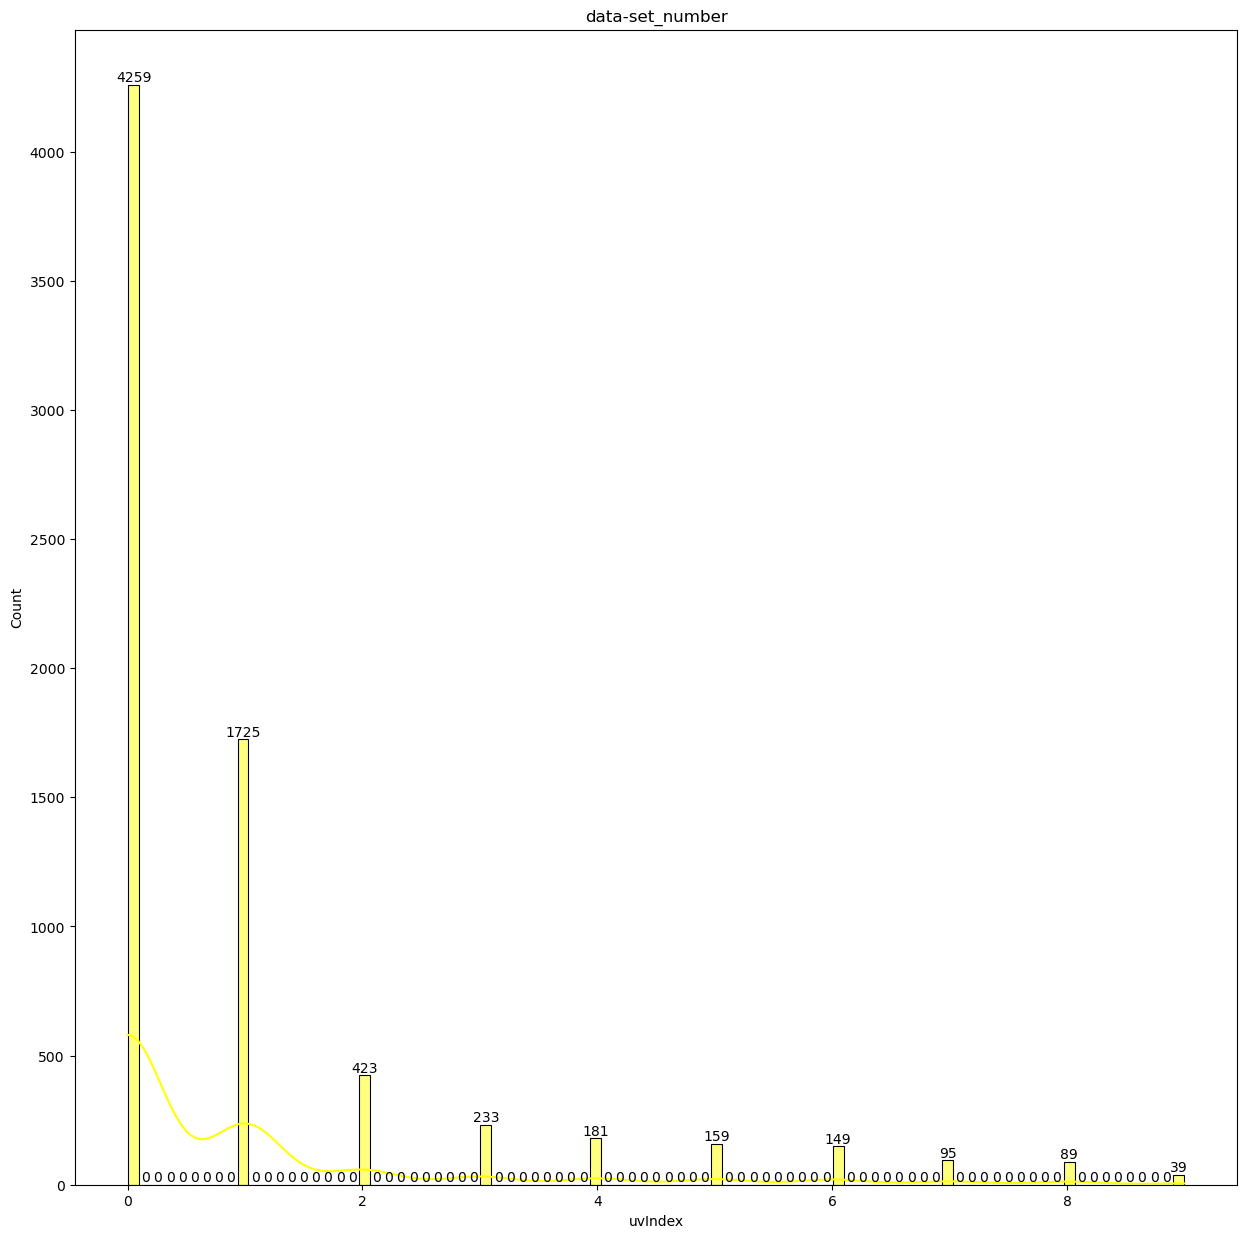

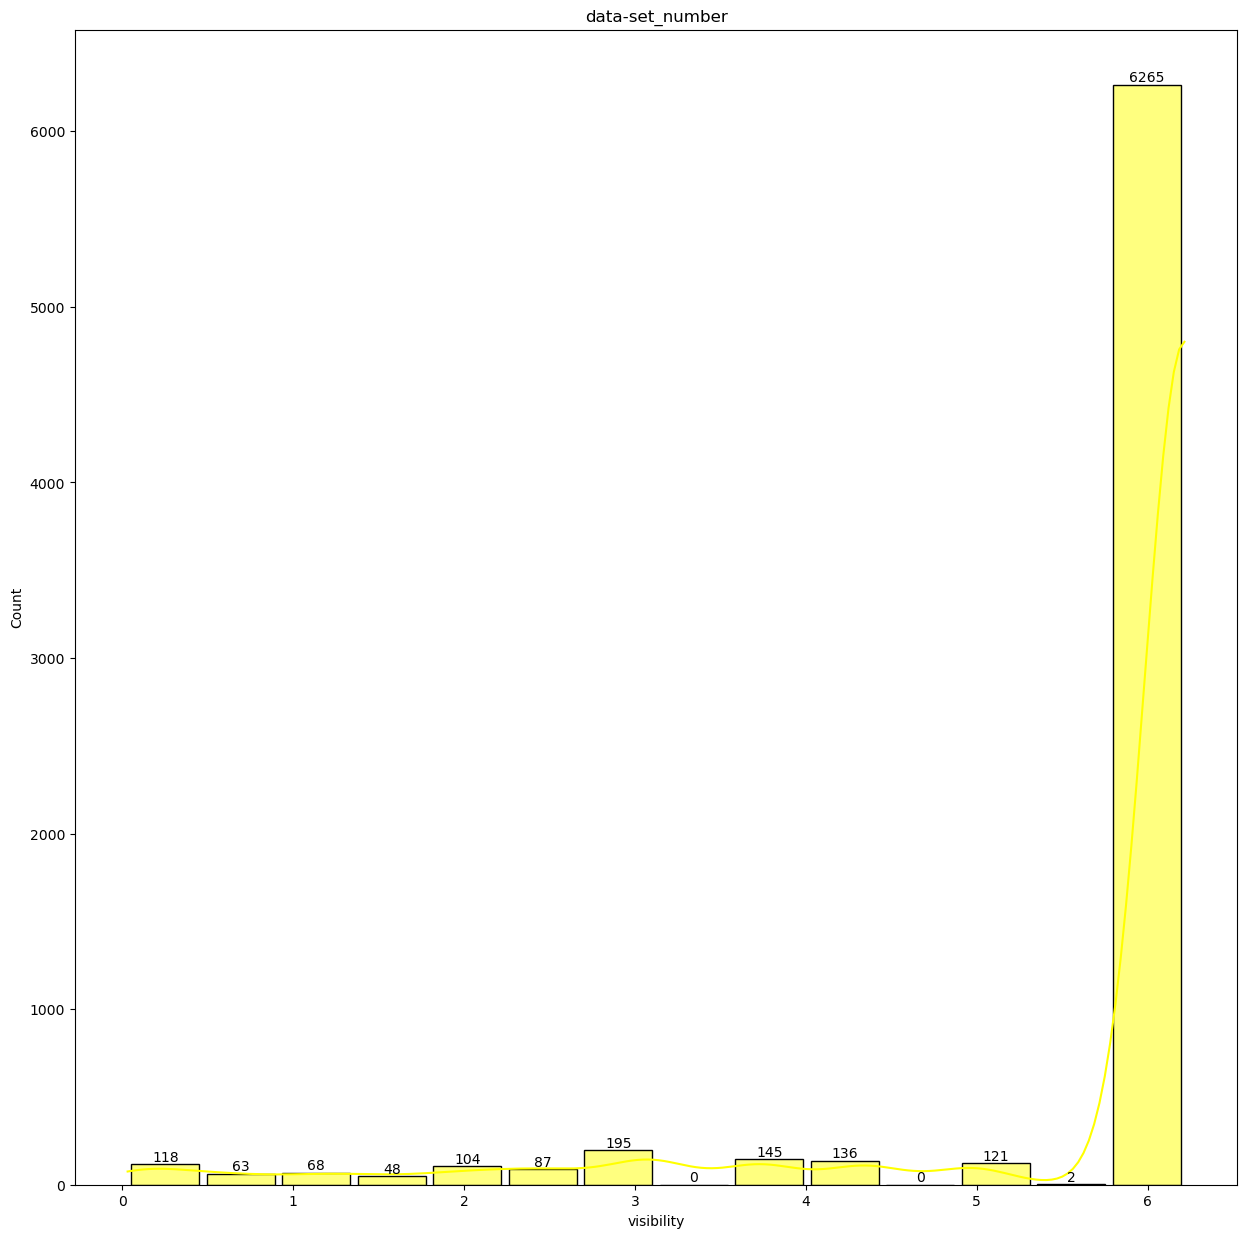

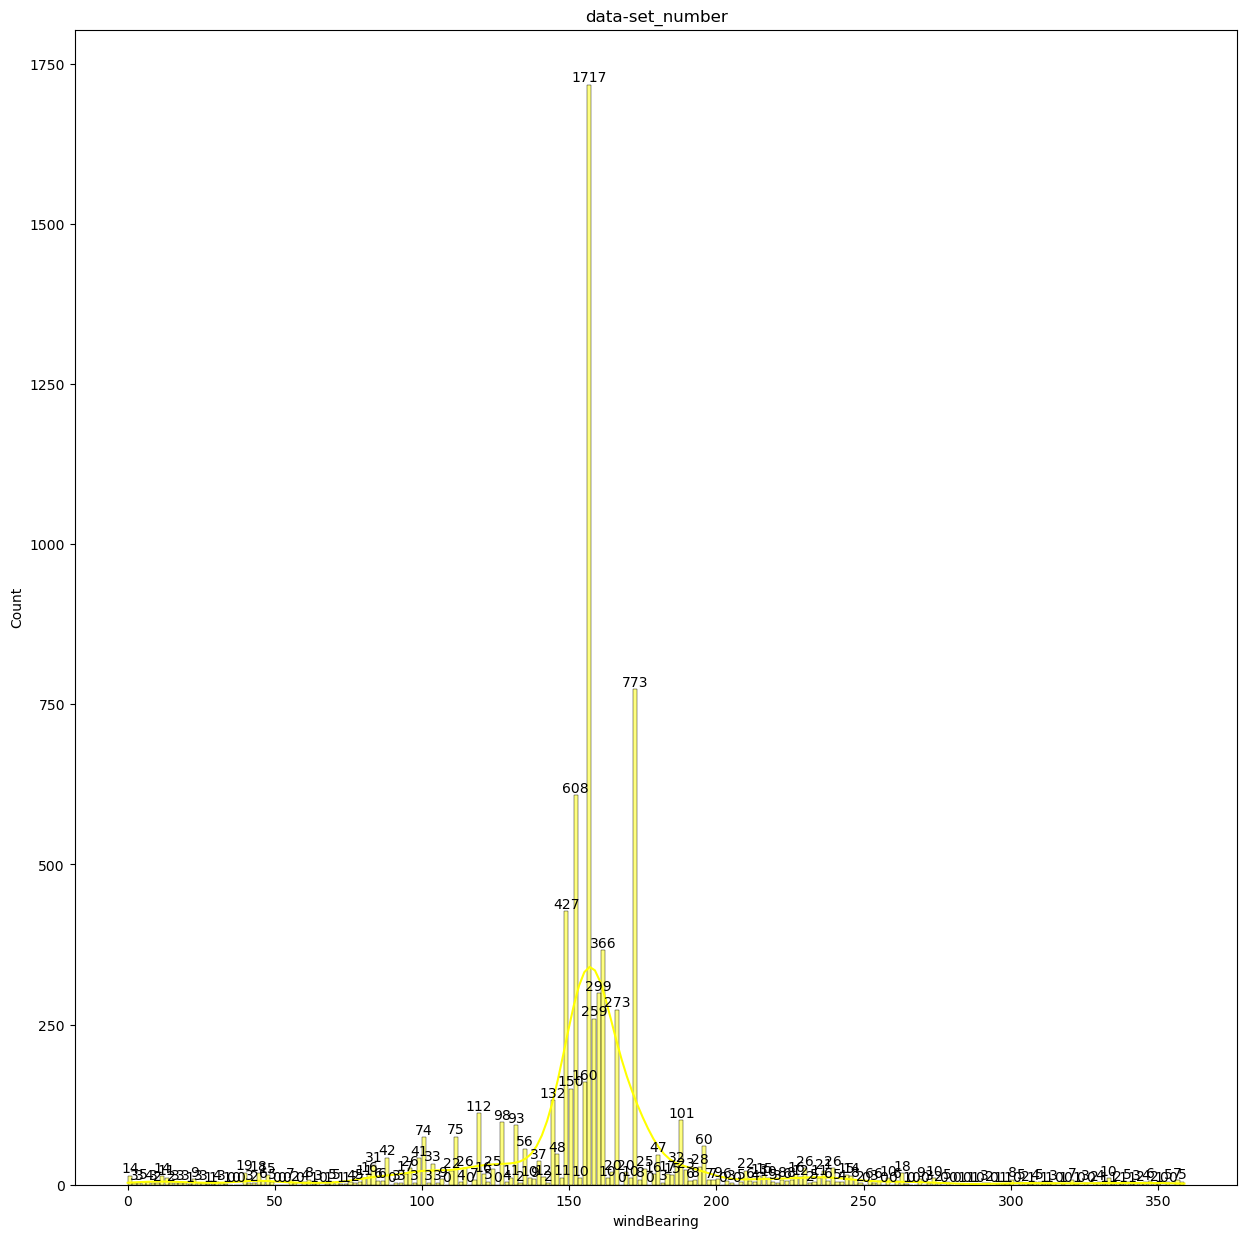

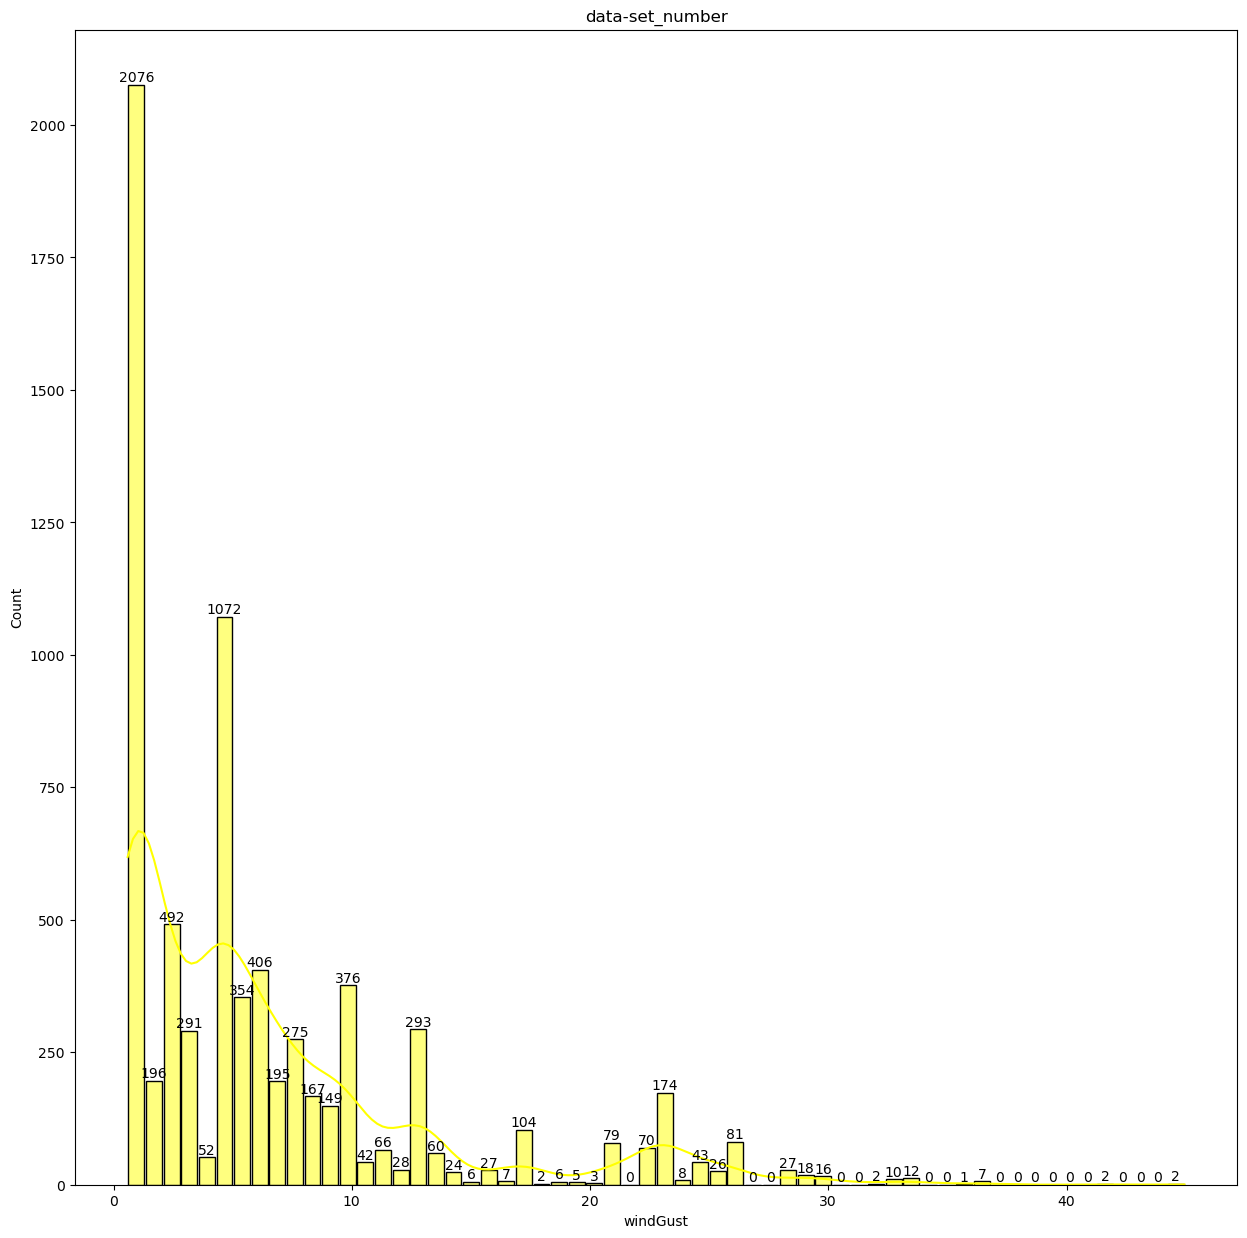

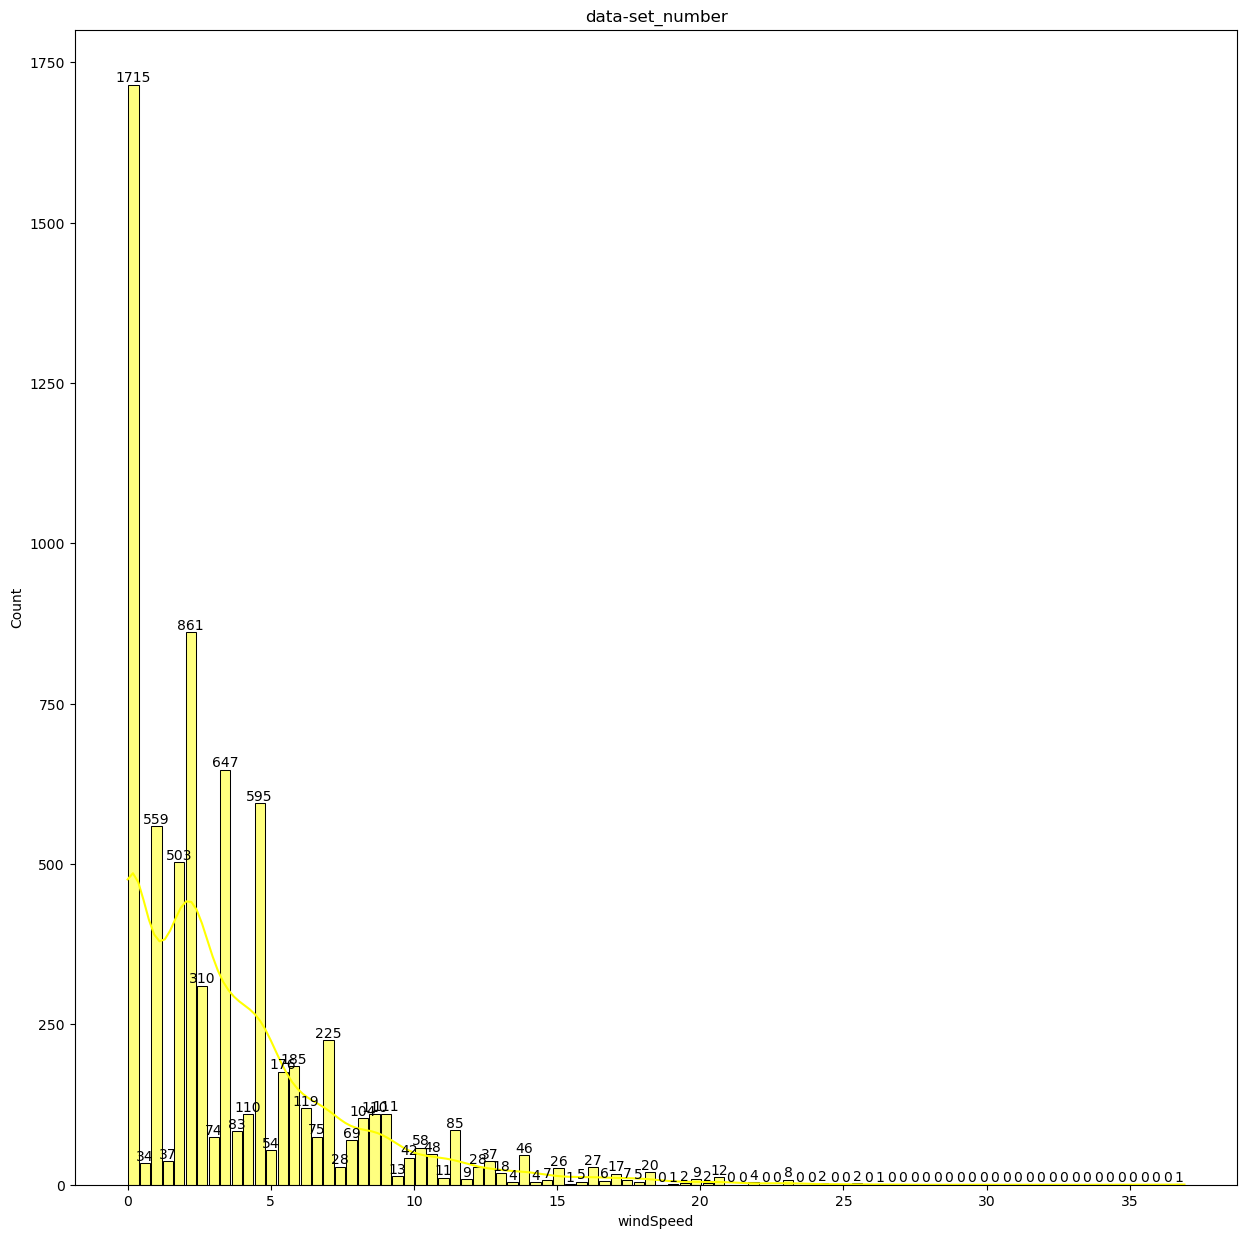

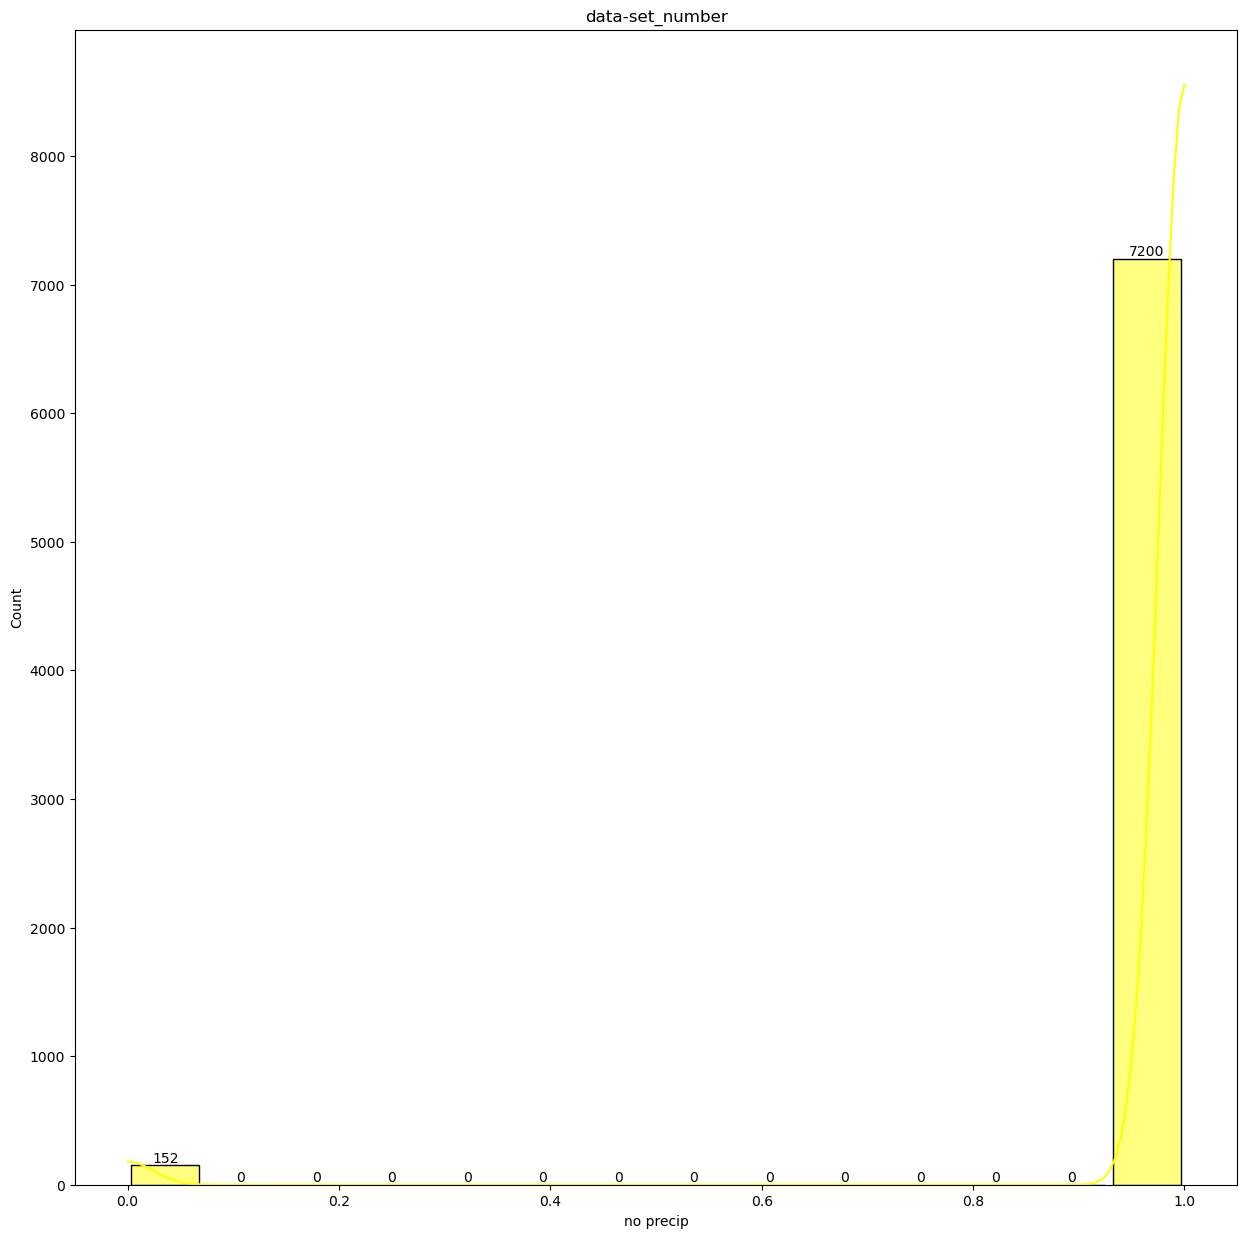

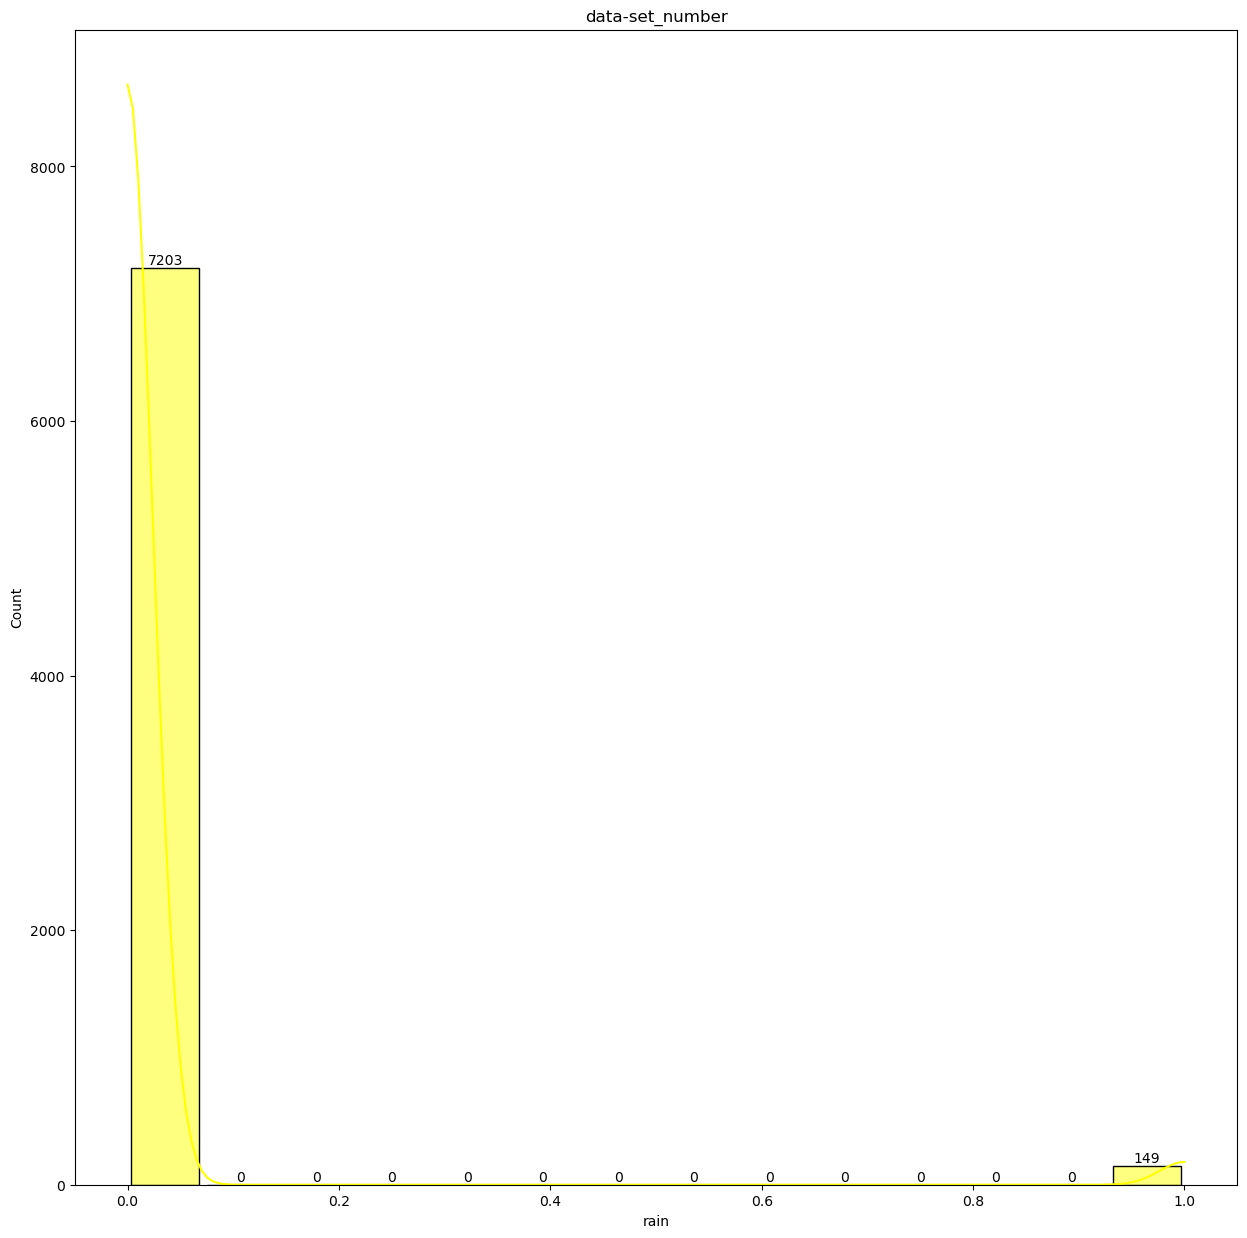

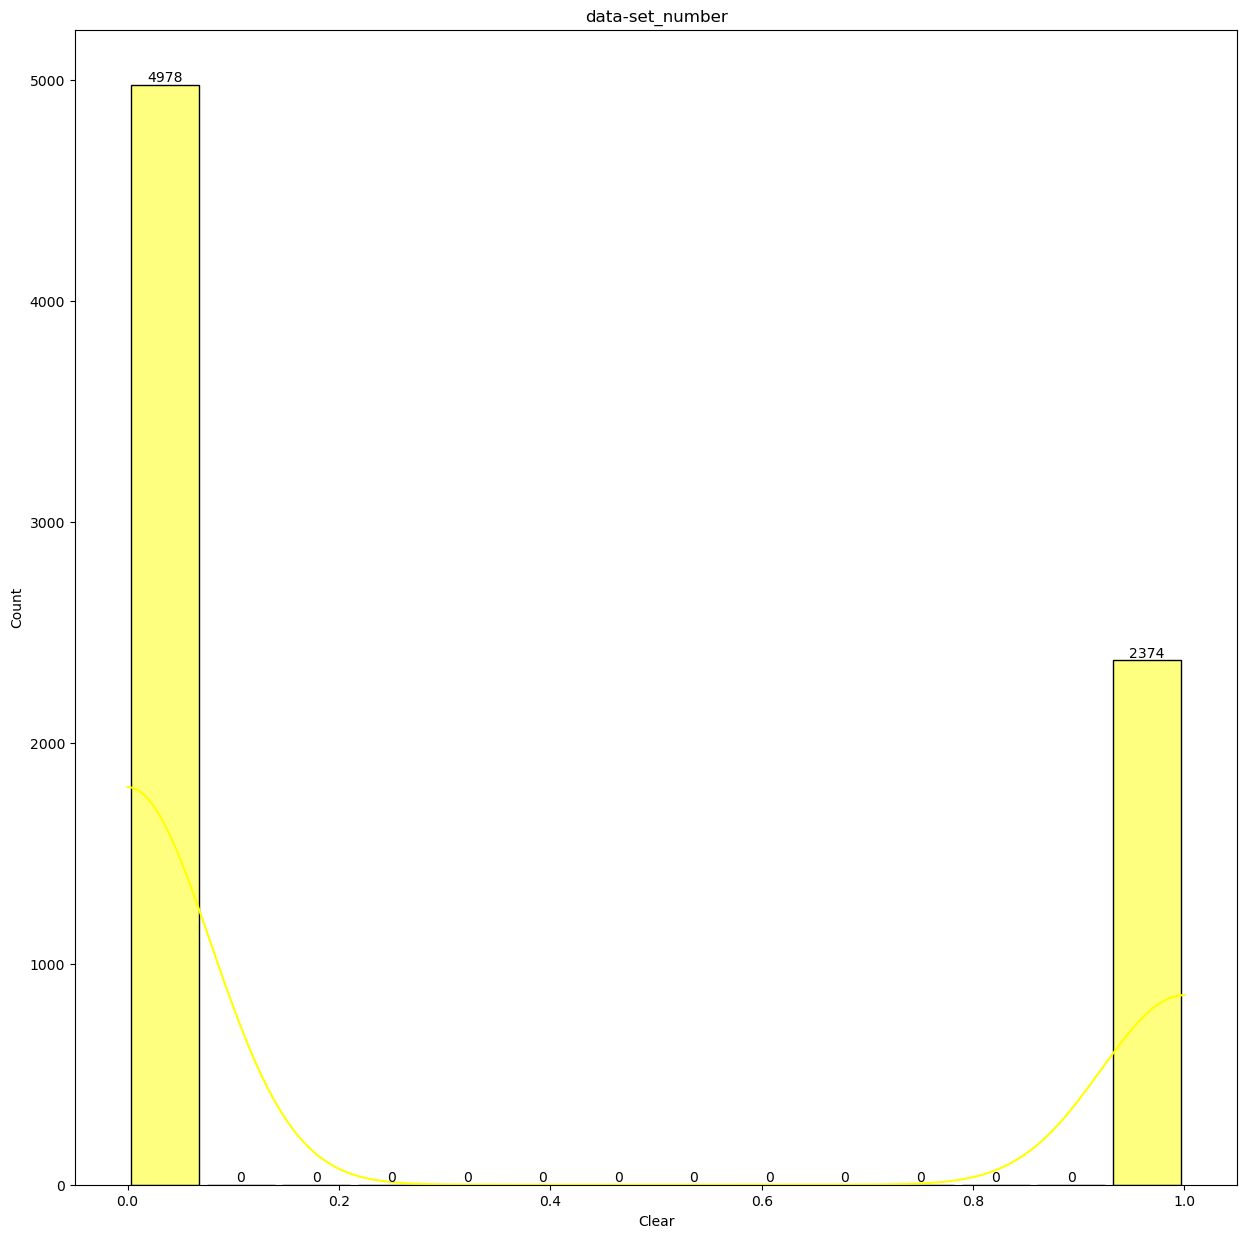

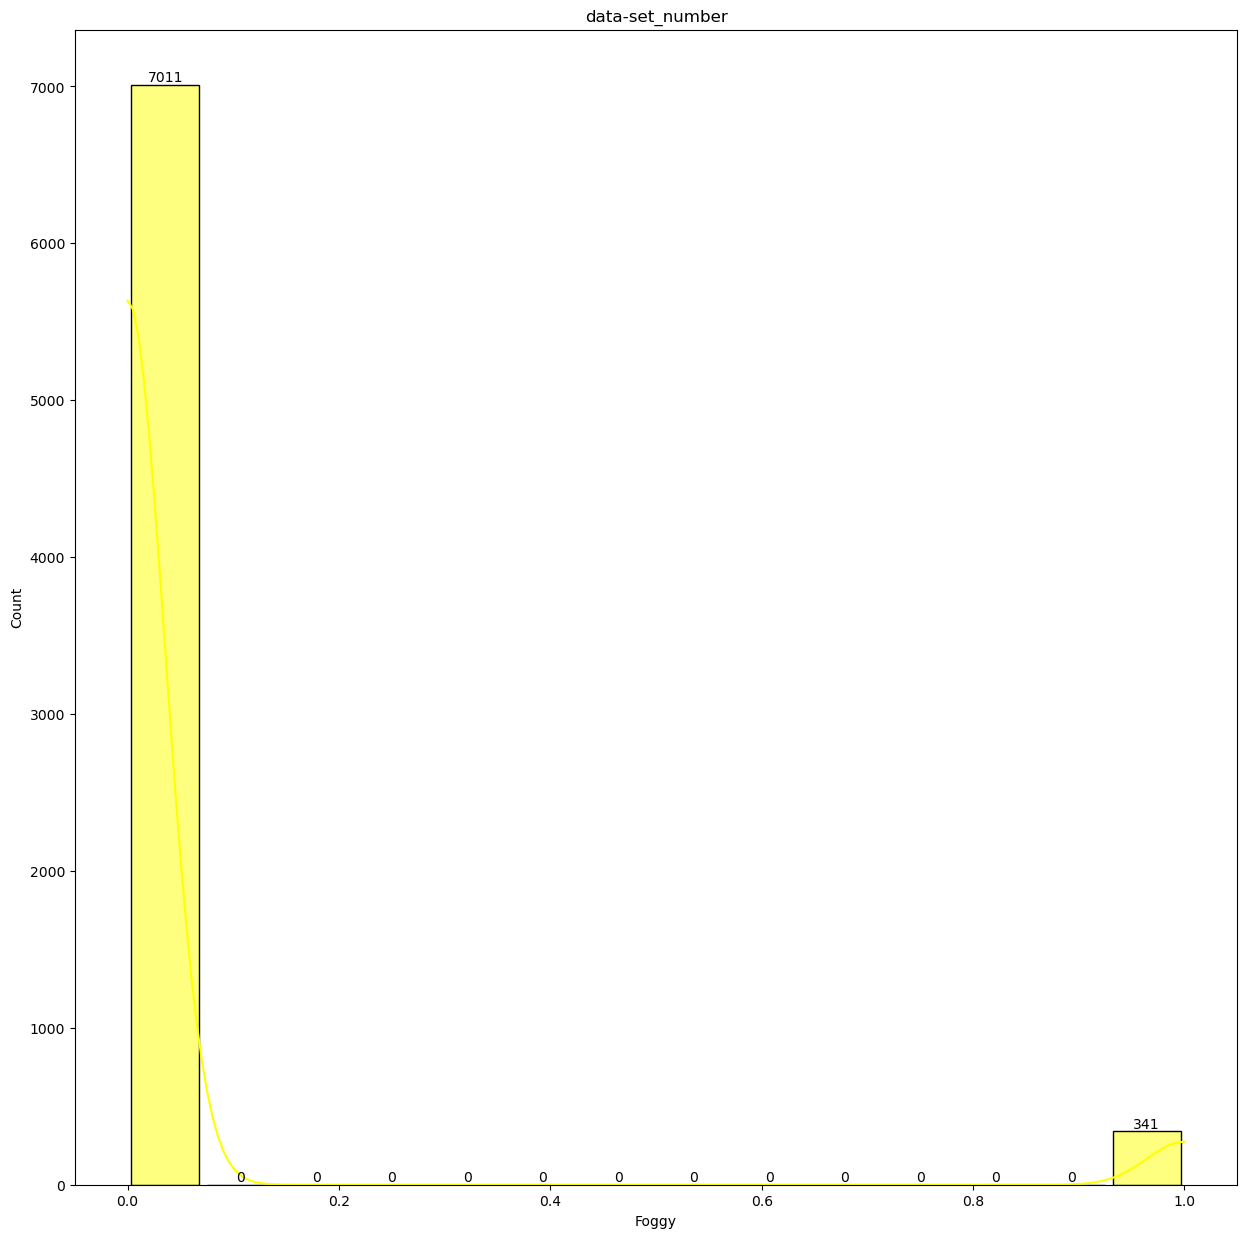

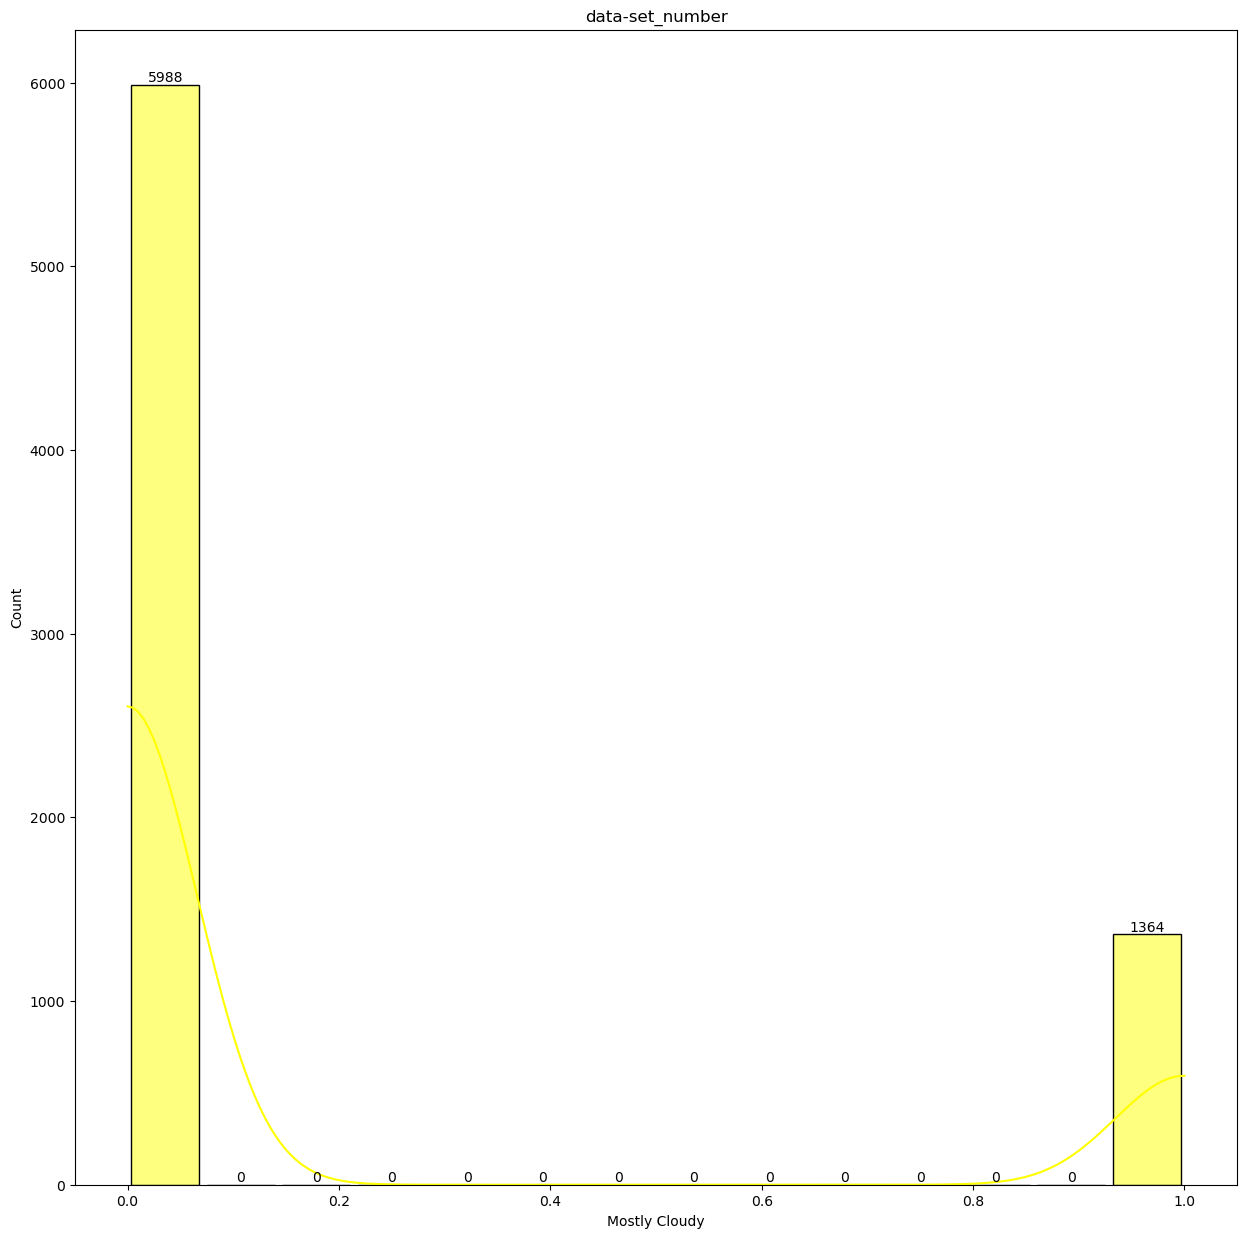

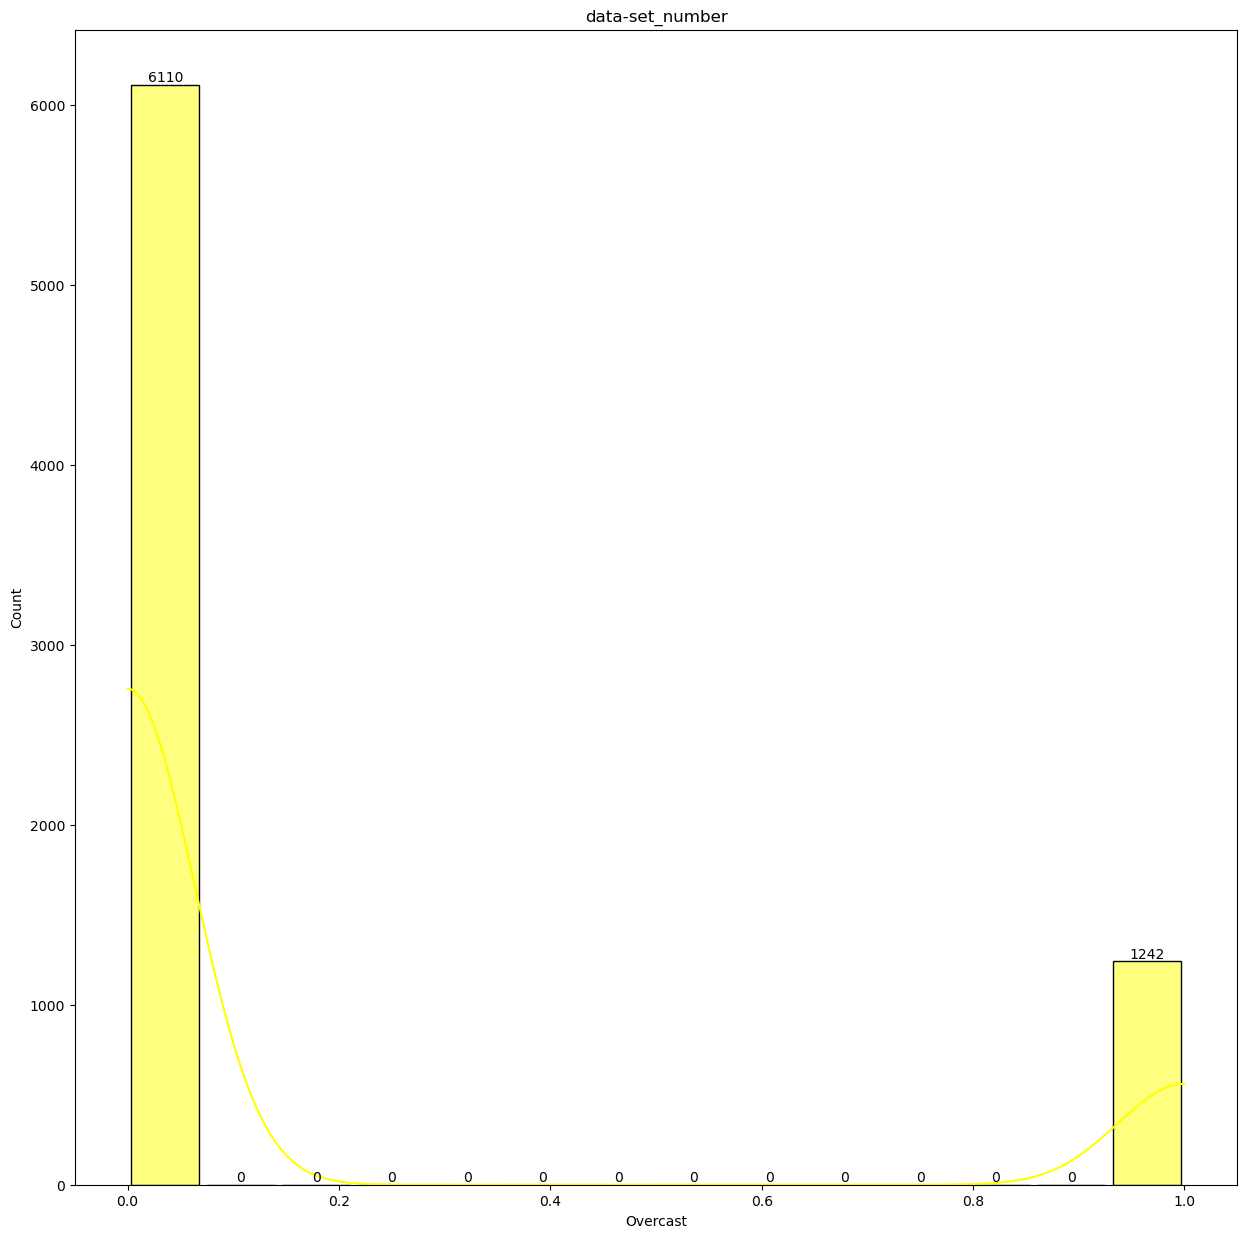

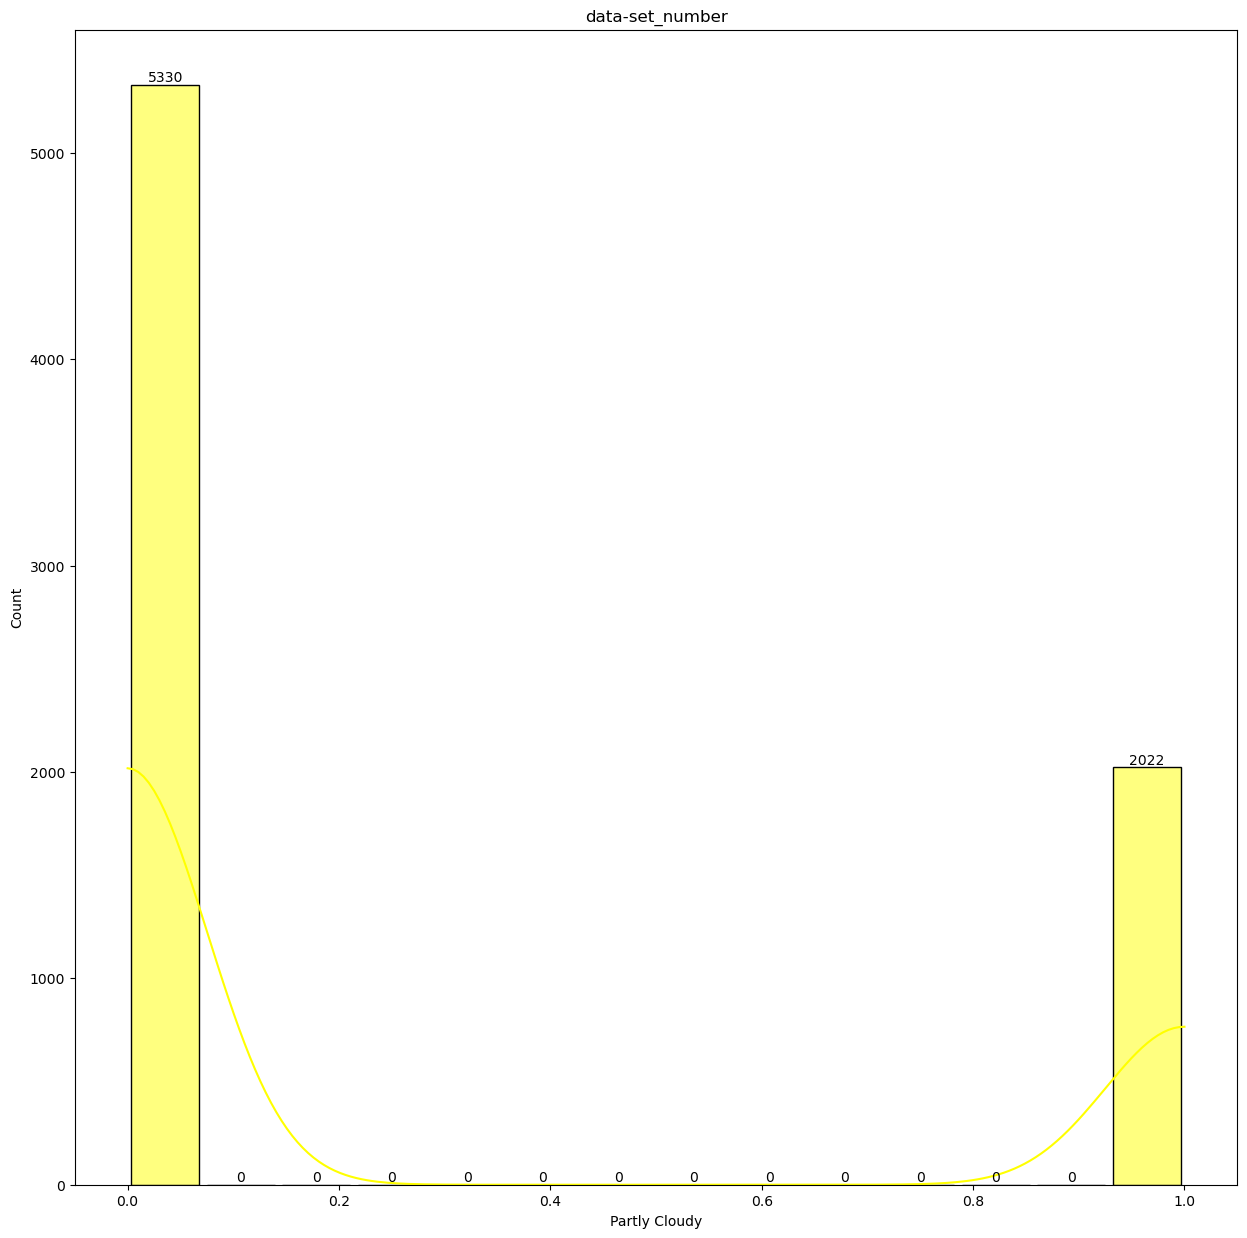

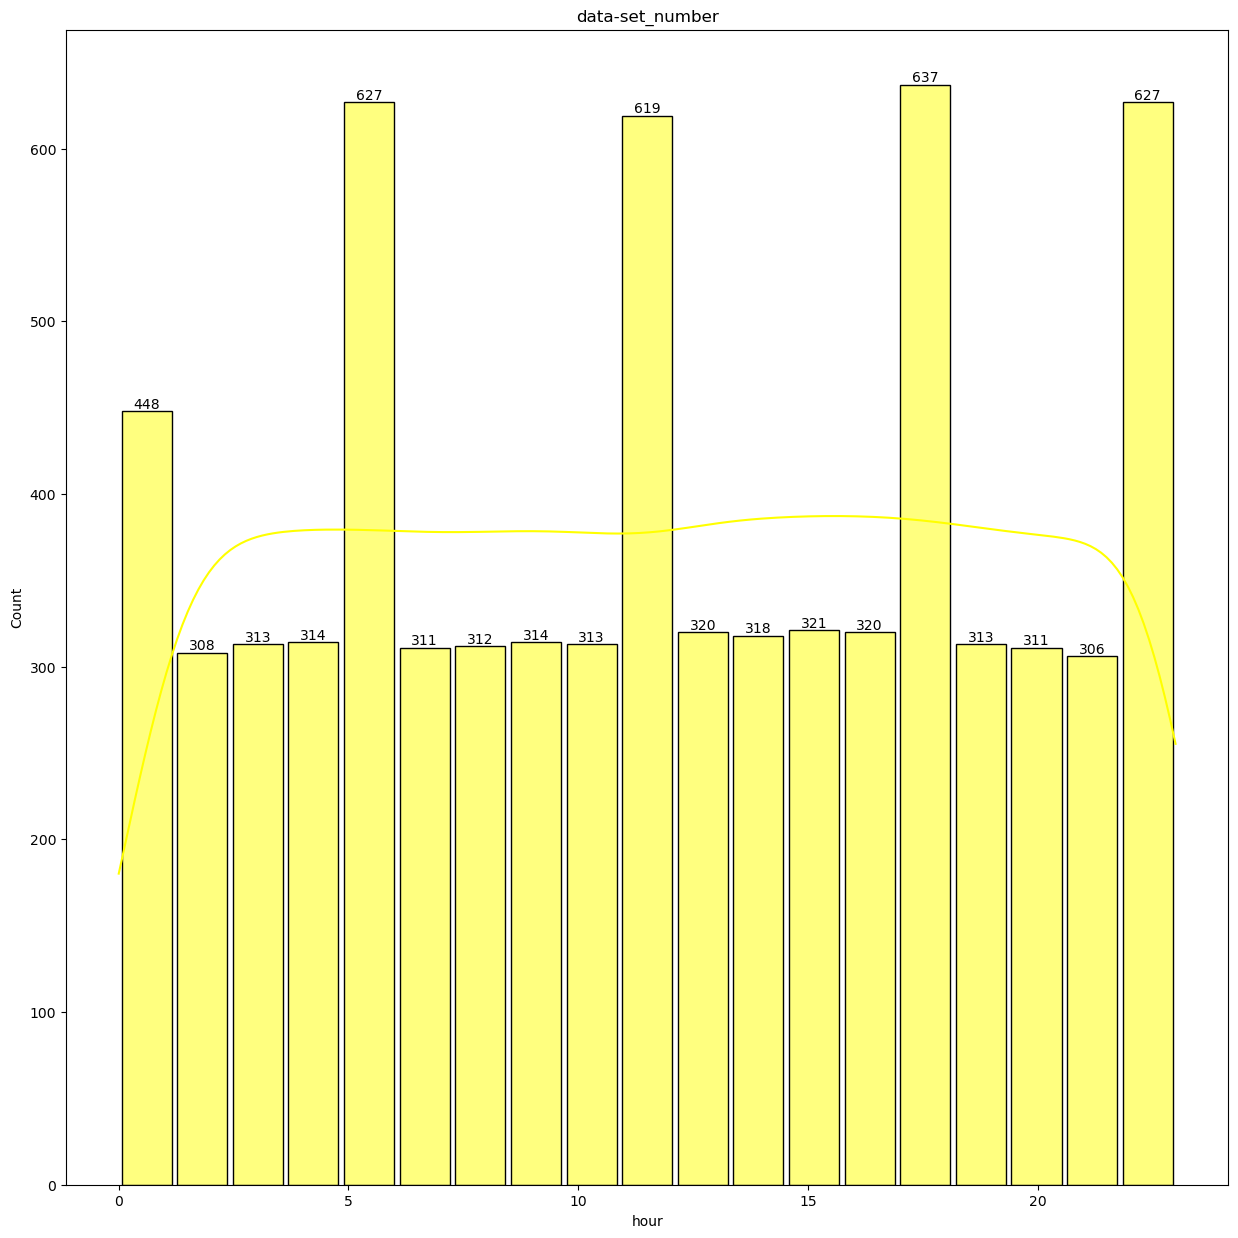

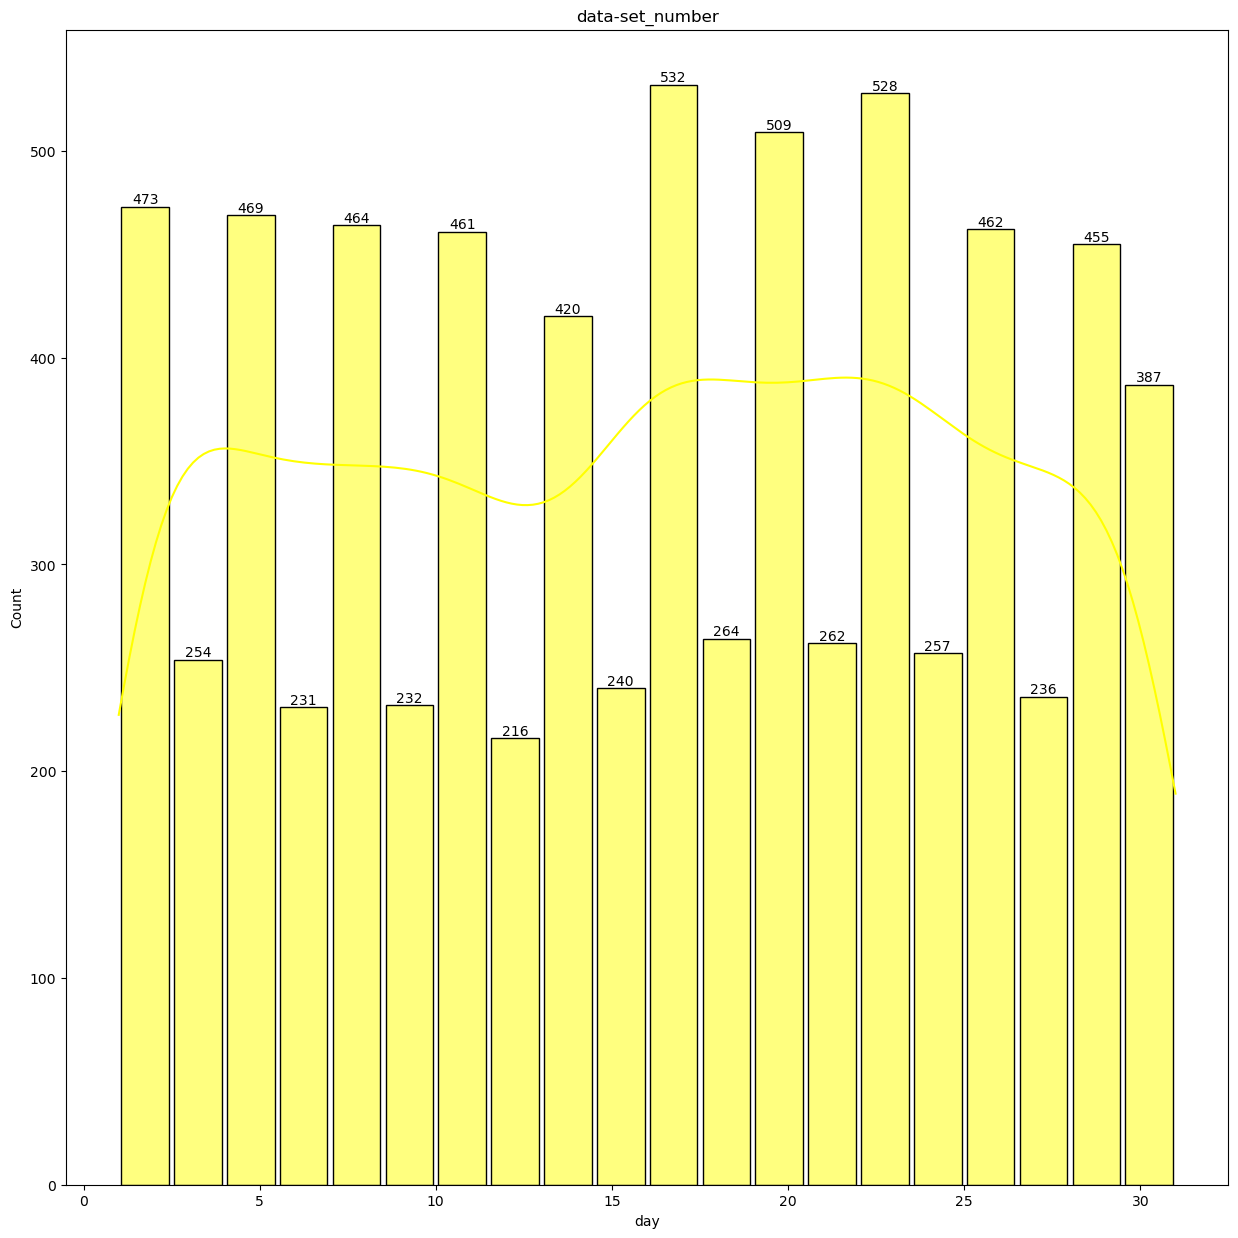

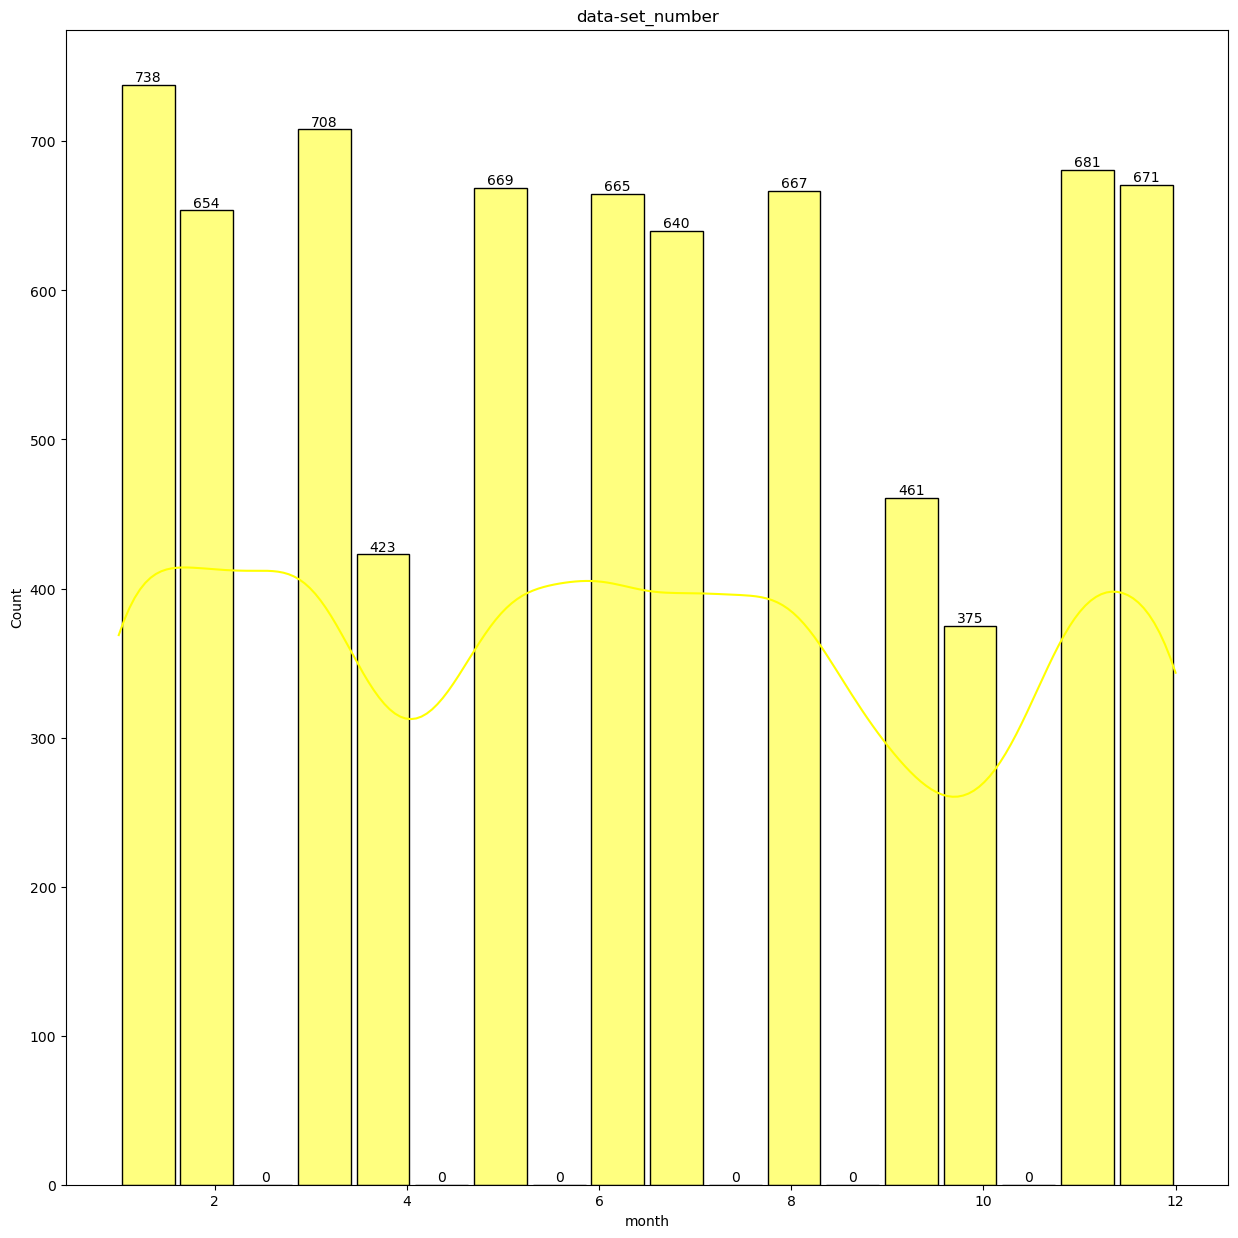

In [ ]:
# Preku plot-ot gledam kakva distribucija imam na numerickite koloni

num_cols = df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
    plt.figure(figsize=(15,15))
    y=sns.histplot(x=i, data=df, shrink=.9,stat='count',kde = True,color='yellow',)
    y.bar_label(y.containers[0])
    plt.title('data-set_number')
    plt.xlabel(i)
    plt.show()

In [ ]:
# Tuka pravam sqrt transformacija na site numericki koloni so cel da se namali varijansata na podatocite 
# i da se napravat pomalku simetricni

def transform_df(df):
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    for col in num_cols:
        df[col] = np.arcsinh(df[col]) + np.finfo(float).eps
    
    return df

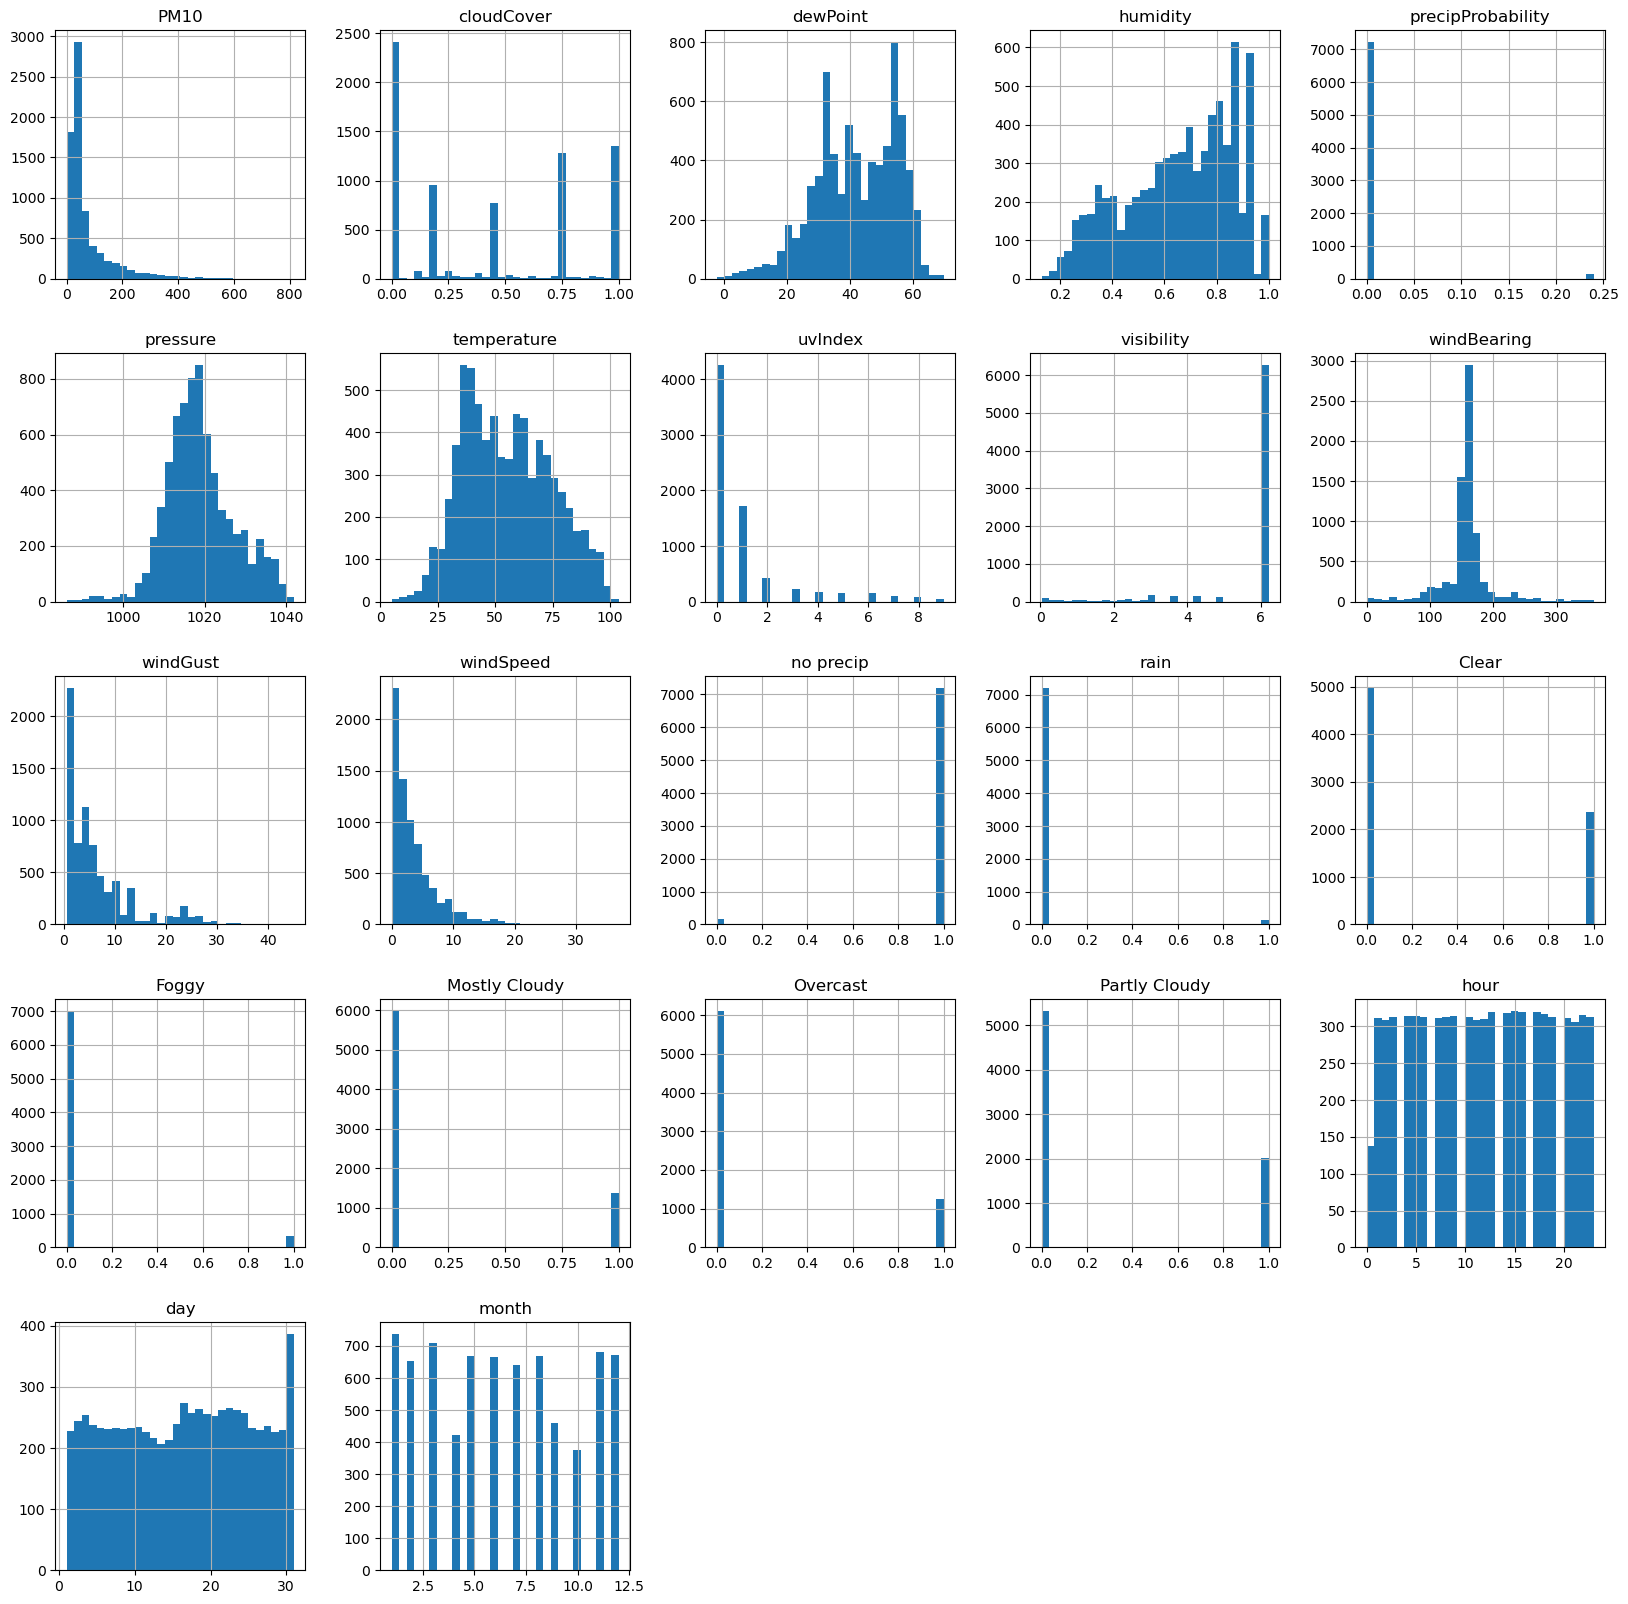

In [ ]:
# Tuka definiram razlicni plotovi so cel da vidime sto imame vizuelno od podatocite vo data-setot.

df.hist(figsize=(20,20),bins=30)
plt.show()

<Axes: xlabel='PM10', ylabel='temperature'>

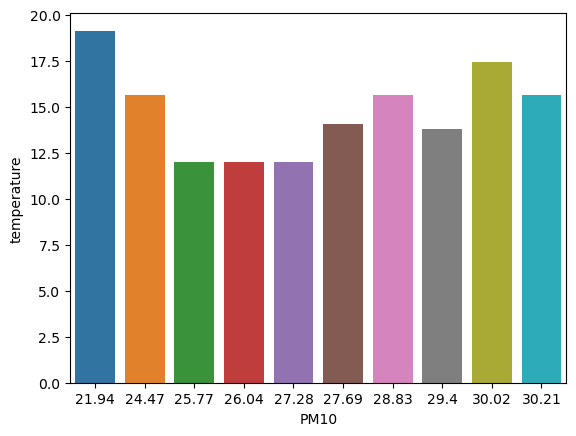

In [ ]:
sns.barplot(x='PM10', y='temperature', data=df[0:10])

In [ ]:
df.groupby(['PM10', 'month'])['humidity'].sum()

PM10     month
0.270    6        0.34
0.600    6        0.31
1.070    6        0.34
1.150    5        0.64
1.200    6        0.50
                  ... 
614.750  12       1.00
652.880  1        1.00
676.910  12       0.94
680.745  9        0.87
815.170  9        0.75
Name: humidity, Length: 7092, dtype: float64

In [ ]:
# Tuka ja encodir-am target kolonata PM10, so LABEL ENCODER.
# morav da ja encodiram zatoa sto float vrednosti se i javuva greska "Unknown label type: continuous"

label_encoder = preprocessing.LabelEncoder()
df['PM10']= label_encoder.fit_transform(df['PM10'])
df['PM10'].unique()

array([1385, 1400, 1341, ..., 3609, 3849, 3848], dtype=int64)

In [ ]:
# Definiranje na target/label kolona i koloni atrubuti vo data setot
# atrubut ni e X
# labela/target kolona ni e y

label_column = 'PM10'

X = df.drop(columns=[label_column])
y = df[label_column]

In [ ]:
print(X.shape)

(7352, 21)


In [ ]:
# Go definiram Train/test split delot, kade zadavam 1000 podatoci da mi se za test, ostanatite za train

num_test = 1000
X_train, X_test = X[:-num_test],X[-num_test:]
y_train, y_test = y[:-num_test],y[-num_test:]

In [ ]:
# Tuka gledame kako gi podelivme podatocite spored train i test.

print("Whole dataset:",len(df))
print("X Train size:",len(X_train))
print("y Train size:",len(y_train))
print("X Test size:",len(X_test))
print("y Test size:",len(y_test))

Whole dataset: 7352
X Train size: 6352
y Train size: 6352
X Test size: 1000
y Test size: 1000


In [ ]:
# Tuka gi standardizirame podatocite vo ist opseg so min/max sclaer-ot

minmax_scaler = preprocessing.MinMaxScaler() 
X_train_scal = minmax_scaler.fit_transform(X_train)
X_test_scal = minmax_scaler.transform(X_test)

In [ ]:
X_train_scal

array([[0.44      , 0.10052763, 0.51724138, ..., 0.        , 0.        ,
        0.        ],
       [0.44      , 0.07567342, 0.50574713, ..., 0.04347826, 0.        ,
        0.        ],
       [0.44      , 0.07567342, 0.56321839, ..., 0.08695652, 0.        ,
        0.        ],
       ...,
       [0.53      , 0.57178562, 0.59770115, ..., 0.39130435, 0.5       ,
        1.        ],
       [0.        , 0.57525687, 0.57471264, ..., 0.43478261, 0.5       ,
        1.        ],
       [0.        , 0.57525687, 0.48275862, ..., 0.47826087, 0.5       ,
        1.        ]])

In [ ]:
X_test_scal

array([[0.23      , 0.56956401, 0.34482759, ..., 0.52173913, 0.5       ,
        1.        ],
       [0.        , 0.57525687, 0.33333333, ..., 0.56521739, 0.5       ,
        1.        ],
       [0.        , 0.59997223, 0.36781609, ..., 0.60869565, 0.5       ,
        1.        ],
       ...,
       [0.        , 0.1531519 , 0.51724138, ..., 0.91304348, 1.        ,
        1.1       ],
       [0.        , 0.1752291 , 0.75862069, ..., 0.95652174, 1.        ,
        1.1       ],
       [0.        , 0.14981949, 0.75862069, ..., 1.        , 1.        ,
        1.1       ]])

### GRID SEARCH CV FOR DECISION TREE, RANDOM FOREST, SVR AND KNN REGRESSION MODELS WITH PIPLINES

In [ ]:
start_time = time.time()

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeRegressor())
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestRegressor())
])

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', SVR())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', KNeighborsRegressor())
])

dt_params = {
    'pca__n_components': [2, 4,],
    'model__max_depth': [2, 4],
    'model__min_samples_split': [2, 4],
}

rf_params = {
    'pca__n_components': [2, 4],
    'model__n_estimators': [5, 10],
    'model__max_depth': [2, 4],
    'model__min_samples_split': [2, 4],
}

svr_params = {
    'pca__n_components': [2, 3],
    'model__C': np.logspace(-3,0, 2),
    'model__gamma': np.logspace(-3,1,2),
    'model__kernel': ['linear', 'rbf']
}

knn_params = {
    'pca__n_components': [2,4],
    'model__n_neighbors': [3,5],
    'model__weights': ['uniform', 'distance']
}

pipelines = [dt_pipeline, rf_pipeline, svr_pipeline, knn_pipeline]
params = [dt_params, rf_params, svr_params, knn_params]

n_comp_pca = [2]    
results = []          
for pca_comps in n_comp_pca:
    for pipeline, pipeline_params in zip(pipelines, params):
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=pca_comps)),
            ('model', pipeline.named_steps['model'])
        ])
        grid_cv = GridSearchCV(pipe, pipeline_params, n_jobs=-1, verbose=5)
        grid_cv.fit(X_train_scal, y_train)
        y_pred = grid_cv.predict(X_test_scal)
        results.append({
            'pipeline': type(pipeline.named_steps['model']),
            'best_params': grid_cv.best_params_,
            'best_score': grid_cv.best_score_
        })
        
for res in results:
    print(f"Best hyperparameters for {res['pipeline']}:\n{res['best_params']}")
    print(f"Best score: {res['best_score']}")

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for <class 'sklearn.tree._classes.DecisionTreeRegressor'>:
{'model__max_depth': 2, 'model__min_samples_split': 2, 'pca__n_components': 2}
Best score: -0.15952324262474876
Best hyperparameters for <class 'sklearn.ensemble._forest.RandomForestRegressor'>:
{'model__max_depth': 2, 'model__min_samples_split': 4, 'model__n_estimators': 10, 'pca__n_components': 2}
Best score: -0.12012068305027138
Best hyperparameters for <class 'sklearn.svm._classes.SVR'>:
{'model__C': 1.0, 'model__gamma': 0.001, 'model__kernel': 'linear', 'pca__n_components': 3}
Best score: -0.21126092009579014
Best hyperparameters for <class 'sklearn.neighbors._regression.KNeighborsRegressor'>:
{'model__n_neighbors': 5, 'model__weights': 'uniform', 'pca__n_component

### RANDOM SEARCH CV FOR DECISION TREE, RANDOM FOREST, SVR AND KNN REGRESSION MODELS WITH PIPLINES

In [ ]:
start_time = time.time()

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', DecisionTreeRegressor())
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', RandomForestRegressor())
])

svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', SVR())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', KNeighborsRegressor())
])

dt_params = {
    'pca__n_components': [3, 5],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [3, 5],
}

rf_params = {
    'pca__n_components': [3, 5],
    'model__n_estimators': [2, 8],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [3, 4],
}

svr_params = {
    'pca__n_components': [1, 4],
    'model__C': np.logspace(-3,0, 10),
    'model__gamma': np.logspace(-3,1,10),
    'model__kernel': ['linear', 'rbf']
}

knn_params = {
    'pca__n_components': [2,4],
    'model__n_neighbors': [3,5],
    'model__weights': ['uniform', 'distance']
}

pipelines = [dt_pipeline, rf_pipeline, svr_pipeline, knn_pipeline]
params = [dt_params, rf_params, svr_params, knn_params]

n_comp_pca = [3]
results = []
for pca_comps in n_comp_pca:
    for pipeline, pipeline_params in zip(pipelines, params):
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=pca_comps)),
            ('model', pipeline.named_steps['model'])
        ])
        rand_cv = RandomizedSearchCV(pipe, pipeline_params, n_iter=10, n_jobs=-1, verbose=5)
        rand_cv.fit(X_train_scal, y_train)
        y_pred = rand_cv.predict(X_test_scal)
        results.append({
            'pipeline': type(pipeline.named_steps['model']),
            'best_params': rand_cv.best_params_,
            'best_score': rand_cv.best_score_
        })
for res in results:
    print(f"Best hyperparameters for {res['pipeline']}:\n{res['best_params']}")
    print(f"Best score: {res['best_score']}")

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters for <class 'sklearn.tree._classes.DecisionTreeRegressor'>:
{'pca__n_components': 3, 'model__min_samples_split': 5, 'model__max_depth': 3}
Best score: -0.2596125131304094
Best hyperparameters for <class 'sklearn.ensemble._forest.RandomForestRegressor'>:
{'pca__n_components': 5, 'model__n_estimators': 8, 'model__min_samples_split': 4, 'model__max_depth': 3}
Best score: -0.2186214664656755
Best hyperparameters for <class 'sklearn.svm._classes.SVR'>:
{'pca__n_components': 4, 'model__kernel': 'linear', 'model__gamma': 0.05994842503189409, 'model__C': 0.46415888336127775}
Best score: -0.20794871795036252
Best hyperparameters for <class 'sklearn.neighbors._regression.KNeighborsRegressor'>:
{'pca__n_components': 2, 'model__weights': 'u

### BAYESIAN OPTIMIZATION FOR DECISION TREE, RANDOM FOREST , SVR AND KNN REGRESSION MODELS WITH BAYES_OPT

In [ ]:
start_time = time.time()

rf_space = {'n_estimators': (10, 200),
            'max_depth': (2, 10),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 5)}

dt_space = {'max_depth': (2, 10),
            'min_samples_split': (2, 10),
            'min_samples_leaf': (1, 5)}

svr_space = {'C': (0.1, 10),
             'epsilon': (0.01, 1),
             'gamma': (0.001, 0.1)}

knn_space = {'n_neighbors': (1, 20),
             'p': (1, 2)}

def optimize_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model_rf = RandomForestRegressor(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=42)
    
    model_rf.fit(X_train_scal, y_train)
    y_pred = model_rf.predict(X_test_scal)
    return -mean_absolute_error(y_test, y_pred) #negative absolute  -- +


def optimize_dt(max_depth, min_samples_split, min_samples_leaf):
    model_dt = DecisionTreeRegressor(max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=42)
    
    model_dt.fit(X_train_scal, y_train)
    y_pred = model_dt.predict(X_test_scal)
    return -mean_absolute_error(y_test, y_pred)


def optimize_svr(C, epsilon, gamma):
    model_svr = SVR(C=C,
                epsilon=epsilon,
                gamma=gamma)
    
    model_svr.fit(X_train_scal, y_train)
    y_pred = model_svr.predict(X_test_scal)
    return -mean_absolute_error(y_test, y_pred)


def optimize_knn (n_neighbors,p):
    model_knn = KNeighborsRegressor(n_neighbors=int(n_neighbors),
                                p=int(p))
    
    model_knn.fit(X_train_scal, y_train)
    y_pred = model_knn.predict(X_test_scal)
    return -mean_absolute_error(y_test, y_pred)

rf_bayes = BayesianOptimization(f=optimize_rf, pbounds=rf_space)
dt_bayes = BayesianOptimization(f=optimize_dt, pbounds=dt_space)
svr_bayes = BayesianOptimization(f=optimize_svr, pbounds=svr_space)
knn_bayes = BayesianOptimization(f=optimize_knn, pbounds=knn_space)

rf_bayes.maximize(init_points=5, n_iter=5)
dt_bayes.maximize(init_points=5, n_iter=5)
svr_bayes.maximize(init_points=5, n_iter=5)
knn_bayes.maximize(init_points=5, n_iter=5)

best_params = rf_bayes.max['params']
best_score = rf_bayes.max['target']
print("Best hyperparameters for Random Forest:", best_params)
print("Best score for Random Forest:", best_score)
print("---------------------------------------------------------------")
best_params = dt_bayes.max['params']
best_score = dt_bayes.max['target']
print("Best hyperparameters for DecisionTreeRegressor:", best_params)
print("Best score for DecisionTreeRegressor:", best_score)
print("---------------------------------------------------------------")
best_params = svr_bayes.max['params']
best_score = svr_bayes.max['target']
print("Best hyperparameters for SVR:", best_params)
print("Best score for SVR:", best_score)
print("---------------------------------------------------------------")
best_params = knn_bayes.max['params']
best_score = knn_bayes.max['target']
print("Best hyperparameters for KNN:", best_params)
print("Best score for KNN:", best_score)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

data = {optimize_rf, optimize_dt, optimize_svr, optimize_knn}

for value in data:
    if isinstance(value, str):
        data.remove(value)
        data.add(value.encode("utf-8"))

with open("data.pickle", "wb") as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

with open("data.pickle", "rb") as f:
    loaded_data = pickle.load(f)

for value in loaded_data:
    if isinstance(value, bytes):
        loaded_data.remove(value)
        loaded_data.add(value.decode("utf-8"))

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -1.317e+0 | 7.378     | 3.939     | 8.09      | 76.35     |
| 2         | -1.321e+0 | 7.037     | 4.683     | 4.318     | 93.6      |
| 3         | -1.296e+0 | 6.427     | 2.49      | 9.647     | 87.76     |
| 4         | -1.293e+0 | 6.578     | 2.837     | 6.354     | 142.8     |
| 5         | -1.236e+0 | 3.867     | 4.734     | 4.684     | 189.3     |
| 6         | -1.239e+0 | 3.304     | 4.879     | 4.986     | 196.4     |
| 7         | -1.34e+03 | 10.0      | 1.0       | 10.0      | 175.8     |
| 8         | -1.292e+0 | 9.527     | 1.271     | 2.04      | 194.5     |
| 9         | -1.251e+0 | 2.0       | 5.0       | 9.842     | 192.3     |
| 10        | -1.25e+03 | 2.0       | 1.0       | 2.0       | 191.8     |
|   iter    |  target   | max_depth | min_sa... | min_sa... |
--------------------------------------------------

### BAYESIAN OPTIMIZATION FOR DECISION TREE, RANDOM FOREST ,SVR AND KNN REGRESSION MODELS WITH HYPEROPT.

In [ ]:
start_time = time.time()

dt_space = {
    'max_depth': hp.choice('max_depth', range(1, 10)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 8))
}

rf_space = {
    'n_estimators': hp.choice('n_estimators', range(10, 30)),
    'max_depth': hp.choice('max_depth', range(1, 15)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 8))
}

svr_space = {
    'C': hp.loguniform('C', -5, 2),
    'gamma': hp.loguniform('gamma', -5, 2),
    'kernel': hp.choice('kernel', ['linear', 'rbf'])
}

knn_space = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 21)),
    'weights': hp.choice('weights', ['uniform', 'distance'])
}


def dt_objective(params):
    model_dt = DecisionTreeRegressor(**params)
    model_dt.fit(X_train_scal, y_train)
    y_pred = model_dt.predict(X_test_scal)
    score_df = -np.mean(cross_val_score(model_dt, X, y, cv=5, scoring='neg_mean_squared_error'))
    return score_df

      
def rf_objective(params):
    model_rf = RandomForestRegressor(**params)
    model_rf.fit(X_train_scal, y_train)
    y_pred = model_rf.predict(X_test_scal)
    score_rf= -np.mean(cross_val_score(model_rf, X, y, cv=5, scoring='neg_mean_squared_error'))
    return score_rf

def svr_objective(params):
    model_svr = SVR(**params)
    model_svr.fit(X_train_scal, y_train)
    y_pred = model_svr.predict(X_test_scal)
    score_svr= -np.mean(cross_val_score(model_svr , X, y, cv=5, scoring='neg_mean_squared_error'))
    return score_svr

def knn_objective(params):
    model_knn = KNeighborsRegressor(**params)
    model_knn.fit(X_train_scal, y_train)
    y_pred = model_knn.predict(X_test_scal)
    score_knn = -np.mean(cross_val_score(model_knn, X, y, cv=5, scoring='neg_mean_squared_error'))
    return score_knn

trials = Trials()
algo = tpe.suggest


trials_dt = Trials()
dt_best = fmin(fn=dt_objective, space=dt_space, algo=tpe.suggest, max_evals=20, trials=trials_dt)
dt_best_score = -trials_dt.best_trial['result']['loss']

trials_rf = Trials()
rf_best = fmin(fn=rf_objective, space=rf_space, algo=tpe.suggest, max_evals=20, trials=trials_rf)
rf_best_score = -trials_rf.best_trial['result']['loss']

trials_svr = Trials()
svr_best = fmin(fn=svr_objective, space=svr_space, algo=tpe.suggest, max_evals=20, trials=trials_svr)
svr_best_score = -trials_svr.best_trial['result']['loss']

trials_knn = Trials()
knn_best = fmin(fn=knn_objective, space=knn_space, algo=tpe.suggest, max_evals=20, trials=trials_knn)
knn_best_score = -trials_knn.best_trial['result']['loss']


print("Decision Tree:")
print("Best hyperparameters:", dt_best)
print("Best score:",dt_best_score)
print('------------------------------------')
print("Random Forest:")
print("Best hyperparameters:", rf_best)
print("Best score:", rf_best_score)
print('------------------------------------')
print("SVR:")
print("Best hyperparameters:", svr_best)
print("Best score:",svr_best_score)
print('------------------------------------')
print("KNN:")
print("Best hyperparameters:", knn_best)
print("Best score:",knn_best_score)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")  

100%|██████████| 20/20 [00:18<00:00,  1.06trial/s, best loss: 2206770.3095938805]
Decision Tree:
Best hyperparameters: {'max_depth': 6, 'min_samples_split': 3}
Best score: -2528431.9962975048
------------------------------------
Random Forest:
Best hyperparameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 5}
Best score: -2390558.756555677
------------------------------------
SVR:
Best hyperparameters: {'C': 3.1131231341608743, 'gamma': 0.013259041512523578, 'kernel': 0}
Best score: -2087503.4154927307
------------------------------------
KNN:
Best hyperparameters: {'n_neighbors': 19, 'weights': 1}
Best score: -2206770.3095938805
Elapsed time: 9 minutes 2 seconds


### GENETIC ALGORITHM OPTIMIZATION FOR DECISION TREE, RANDOM FOREST, SVR AND KNN REGRESSSION MODELS

In [ ]:
start_time = time.time()

dt_space = {
    'max_depth': Integer(2, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5)
}

rf_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(2, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5)
}

svr_space = {
    'C': Continuous(0.1, 10),
    'epsilon': Continuous(0.01, 1),
    'gamma': Continuous(0.001, 0.1)
}

knn_space = {
    'n_neighbors': Integer(1, 20),
    'p': Categorical([1, 2])
}

dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

cv = StratifiedKFold(n_splits=5, shuffle=True)

dt_opt = GASearchCV(estimator=dt_model, 
                    param_grid=dt_space,
                    cv=cv, 
                    scoring='neg_mean_squared_error', 
                    n_jobs=-1, 
                    verbose=True,
                    population_size=5,
                    generations=5)

rf_opt = GASearchCV(estimator=rf_model, 
                    param_grid=rf_space, 
                    cv=cv,scoring='neg_mean_squared_error', 
                    n_jobs=-1, 
                    verbose=True,
                    population_size=5,
                    generations=5)

svr_opt = GASearchCV(estimator=svr_model,
                     param_grid=svr_space,
                     cv=cv, 
                     scoring='neg_mean_squared_error', 
                     n_jobs=-1, 
                     verbose=True,
                     population_size=5,
                     generations=5)

knn_opt = GASearchCV(estimator=knn_model, 
                     param_grid=knn_space, 
                     cv=cv,
                     scoring='neg_mean_squared_error', 
                     n_jobs=-1, 
                     verbose=True,
                     population_size=5,
                     generations=5)

dt_opt.fit(X_train_scal, y_train)
y_pred = dt_opt.predict(X_test_scal)

rf_opt.fit(X_train_scal, y_train)
y_pred = rf_opt.predict(X_test_scal)

svr_opt.fit(X_train_scal, y_train)
y_pred = svr_opt.predict(X_test_scal)

knn_opt.fit(X_train_scal, y_train)
y_pred = knn_opt.predict(X_test_scal)

print("Decision Tree:")
print("Best parameters:", dt_opt.best_params_)
print("Best score:", -dt_opt.best_score_)

print("\nRandom Forest:")
print("Best parameters:", rf_opt.best_params_)
print("Best score:", -rf_opt.best_score_)

print("\nSVR:")
print("Best parameters:", svr_opt.best_params_)
print("Best score:", -svr_opt.best_score_)

print("\nKNN:")
print("Best parameters:", knn_opt.best_params_)
print("Best score:", -knn_opt.best_score_)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

gen	nevals	fitness	fitness_std	fitness_max	fitness_min 
0  	5     	-869246	144100     	-700015    	-1.08776e+06
1  	10    	-733164	48088.3    	-700015    	-827487     
2  	10    	-707603	6339.44    	-700015    	-719190     
3  	10    	-705226	3102.42    	-702234    	-710712     
4  	10    	-699324	1643.81    	-697520    	-701932     
5  	10    	-698882	1112.34    	-697520    	-699790     
gen	nevals	fitness	fitness_std	fitness_max	fitness_min 
0  	5     	-976616	153444     	-723291    	-1.18064e+06
1  	10    	-868083	72414.7    	-723291    	-906973     
2  	10    	-900734	2048.64    	-896798    	-902709     
3  	10    	-844397	46347.6    	-806555    	-901161     
4  	10    	-772314	43320.4    	-719279    	-809903     
5  	10    	-736706	34927.1    	-718456    	-806555     
gen	nevals	fitness     	fitness_std	fitness_max 	fitness_min 
0  	5     	-1.82037e+06	130344     	-1.61002e+06	-1.97009e+06
1  	10    	-1.62725e+06	33940.8    	-1.61002e+06	-1.69513e+06
2  	10    	-1.61741e+06	14264.

### TPOT Classifier


In [ ]:
# TPOT generira modeli so razlicni hiperparametri i gi procenuva nivnite performansi. Gi selektira najdobrite modeli
# so najdobrite performanci i vraka najdobar model za klasifikacija.

start_time = time.time()

tpot = TPOTClassifier(generations=5, population_size=5, verbosity=2, cv=5,random_state=42)

tpot.fit(X_train, y_train)

y_pred = tpot.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred)
mae_3 = mean_absolute_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_3)
print("Mean Absolute Error:", mae_3)
print("R-squared:", r2_3)

end_time = time.time()
elapsed_time = end_time - start_time

minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Elapsed time: {minutes} minutes {seconds} seconds")

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.00078715376942949

Generation 2 - Current best internal CV score: 0.00078715376942949

Generation 3 - Current best internal CV score: 0.00078715376942949

Generation 4 - Current best internal CV score: 0.00078715376942949

Generation 5 - Current best internal CV score: 0.00078715376942949

Best pipeline: MultinomialNB(Nystroem(input_matrix, gamma=0.30000000000000004, kernel=cosine, n_components=3), alpha=0.001, fit_prior=True)
Mean Squared Error: 6098559.398
Mean Absolute Error: 2254.678
R-squared: -1.749115225039696
Elapsed time: 69 minutes 12 seconds


### PICKLING

In [ ]:
# Imam pickle napraveno za optimize funkciite vo delot kaj bayesian optimization with bayes_opt
# iako probav da go encodiram error-ot povtorno go vadese 
# not UTF-8 encoded.